In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.spatial.distance as ssd
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

In [2]:
#df = pd.read_csv("bulk/stability_time_deseq2_pca_distances_noFilter_wSC.tsv",sep="\t",index_col=0)

#df = pd.read_csv("bulk/stability_time_deseq2_limma_corrS_pca_distances_noFilter_wSC.tsv",sep="\t",index_col=0)


#df = pd.read_csv("bulk/stability_time_deseq2_limma_corrT_pca_distances_noFilter_wSC.tsv",sep="\t",index_col=0)

df = pd.read_csv("bulk/stability_time_deseq2_limma_corrG_pca_distances_noFilter_wSC.tsv",sep="\t",index_col=0)

meta = pd.read_csv("bulk/stability_timepoints_meta_wSC.tsv",sep="\t",index_col=0)
expr = pd.read_csv("bulk/stability_timepoints_wSC.tsv",sep="\t",index_col=0)
vsd = pd.read_csv("bulk/stability_time_deseq2_vsd_noFilter_wSC.tsv",sep="\t",index_col=0)

In [3]:
sample_markers_all = []
for i in set(meta['sample']):
    marker_df = pd.read_csv("stability_plots/"+str(i)+"_deseq2.tsv",sep="\t",index_col=0)
    marker_df_pos = marker_df.loc[marker_df['log2FoldChange']>0]
    marker_df_pos_sig = marker_df_pos.sort_values(by='padj')
    sample_markers = list(marker_df_pos_sig.head(n=10).index)
    sample_markers_all = sample_markers_all + sample_markers


In [4]:
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

#set colors
colors = [
    'red',
    'green',
    'blue',
    'cyan',
    'magenta',
    'yellow',
    'black',
    'lightblue',
    'orange',
    'purple',
    'brown',
    'pink'
]

leaf_colors = {}
for sample,color in zip(list(set(meta['sample'])),colors):
    sample_samples = list(meta.loc[meta['sample']==sample].index)
    for ss in sample_samples:
        leaf_colors[ss] = color


In [5]:
distance_matrix = df

In [6]:
# Convert the square distance matrix to condensed form
def square_to_condensed(square_matrix):
    # Ensure the matrix is square
    assert square_matrix.shape[0] == square_matrix.shape[1], "Distance matrix must be square"
    # Use the upper triangle indices to extract the condensed form
    triu_indices = np.triu_indices(square_matrix.shape[0], k=1)
    condensed_matrix = square_matrix[triu_indices]
    return condensed_matrix

condensed_distance_matrix = square_to_condensed(distance_matrix.values)

# Perform hierarchical clustering using the condensed distance matrix
linkage_matrix = sch.linkage(condensed_distance_matrix, method='ward')


In [7]:
leaf_colors

{'Stability_d21_sample_1': 'red',
 'Stability_d49_sample_1': 'red',
 'Stability_d35_sample_1': 'red',
 'Stability_d42_sample_1': 'red',
 'Stability_d10_sample_1': 'red',
 'Stability_d28_sample_1': 'red',
 'p1_D4': 'red',
 'Stability_d21_sample_2': 'green',
 'Stability_d49_sample_2': 'green',
 'Stability_d35_sample_2': 'green',
 'Stability_d42_sample_2': 'green',
 'Stability_d10_sample_2': 'green',
 'Stability_d28_sample_2': 'green',
 'p1_D8': 'green',
 'Stability_d21_sample_3': 'blue',
 'Stability_d49_sample_3': 'blue',
 'Stability_d35_sample_3': 'blue',
 'Stability_d42_sample_3': 'blue',
 'Stability_d10_sample_3': 'blue',
 'Stability_d28_sample_3': 'blue',
 'p1_D10': 'blue',
 'Stability_d21_sample_4': 'cyan',
 'Stability_d49_sample_4': 'cyan',
 'Stability_d35_sample_4': 'cyan',
 'Stability_d42_sample_4': 'cyan',
 'Stability_d10_sample_4': 'cyan',
 'Stability_d28_sample_4': 'cyan',
 'p1_B4': 'cyan',
 'Stability_d21_sample_5': 'magenta',
 'Stability_d49_sample_5': 'magenta',
 'Stability

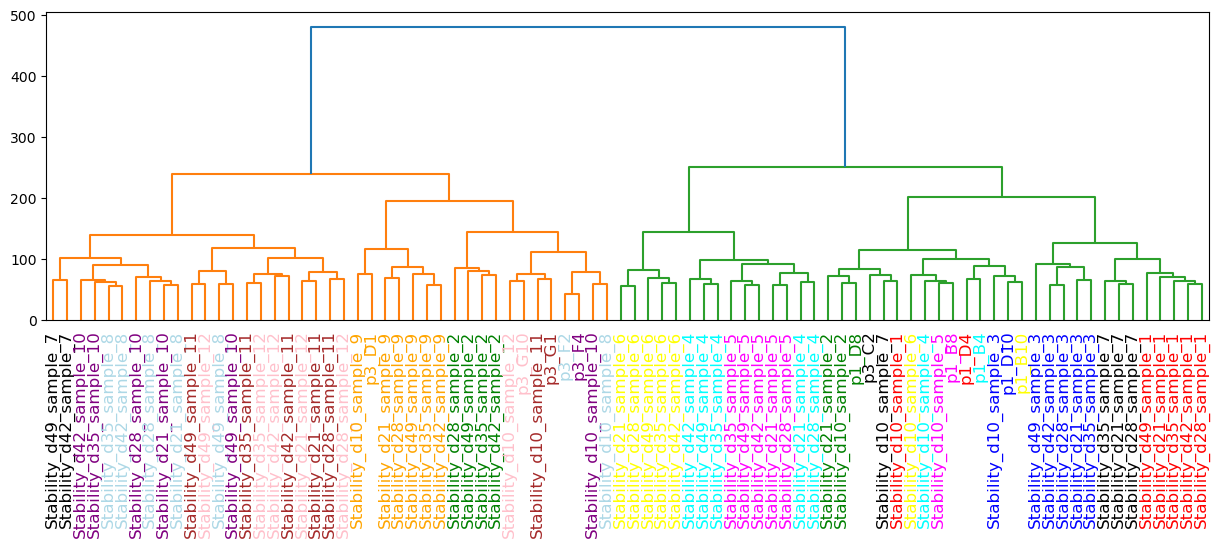

In [8]:
plt.figure(figsize=(15,4))
# Create the dendrogram with custom leaf label colors
dendrogram = sch.dendrogram(
    linkage_matrix,
    labels=df.index,
    leaf_rotation=90,  # Rotate leaf labels for better readability
    leaf_font_size=12  # Font size for leaf labels
)

# Manually color the leaves
ax = plt.gca()
x_labels = ax.get_xmajorticklabels()

dendrogram_labels = []
for label in x_labels:
    txt = label.get_text()
    color_code = leaf_colors[txt]
    label.set_color(color_code)
    dendrogram_labels.append(txt)

plt.savefig("stability_plots/dendrogram_colored_by_sample_noFilter_wSC.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()


In [11]:
sample2ID = {
    '1': 'p1_D4',
    '2': 'p1_D8',
    '3': 'p1_D10',
    '4': 'p1_B4',
    '5': 'p1_B8',
    '6': 'p1_B10',
    '7': 'p3_C2',
    '8': 'p3_F2',
    '9': 'p3_D1',
    '10': 'p3_F4',
    '11': 'p3_G1',
    '12': 'p3_G10'}

sample_fillcolors = {
    'p1_D4': '#ffffff',
    'p1_D8': '#66557d',
    'p1_D10': '#6199b4',
    'p1_B4': '#ffd762',
    'p1_B8': '#ab8c62',
    'p1_B10': '#a8b180',
    'p3_C2': '#ffffff',
    'p3_F2': '#ffffff',
    'p3_D1': '#cc623f',
    'p3_F4': '#9a7da7',
    'p3_G1': '#ffffff',
    'p3_G10': '#b8b78b'}

sample_BMcolors = {
    'p1_D4': '#CBCCCC',
    'p1_D8': '#CBCCCC',
    'p1_D10': '#CBCCCC',
    'p1_B4': '#CBCCCC',
    'p1_B8': '#CBCCCC',
    'p1_B10': '#CBCCCC',
    'p3_C2': '#4E835E',
    'p3_F2': '#8DC7DD',
    'p3_D1': '#8DC7DD',
    'p3_F4': '#8DC7DD',
    'p3_G1': '#102A4D',
    'p3_G10': '#102A4D'}

In [46]:
mpl.rcParams['pdf.fonttype'] = 42

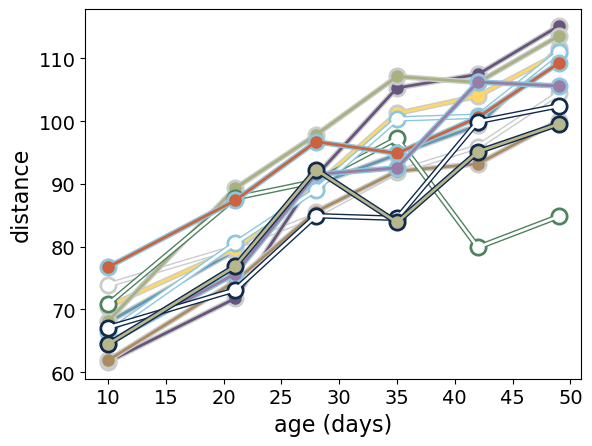

In [47]:
time = [10,21,28,35,42,49]
for sample in sample2ID.keys():
    sample_name = "sample_"+str(sample)
    sample_timepoints = [x for x in df.index if x.endswith(sample_name)]
    sample_timepoints = list(meta.loc[sample_timepoints].sort_values(by='t_int').index)
    a = df.loc[sample2ID[sample],sample_timepoints]
    fill_color = sample_fillcolors[sample2ID[sample]]
    line_color = sample_BMcolors[sample2ID[sample]]
    plt.plot(time,a,'-o', color=line_color, linewidth=4,markersize=12)  # Outline with a thick black line
    plt.plot(time,a,'-o',label=sample2ID[sample],color=fill_color,linewidth=2,markersize=8)
#plt.legend()
plt.xlabel("age (days)",fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("distance",fontsize=16)
plt.savefig("stability_plots/distance_vs_screen_corrG.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.savefig("stability_plots/distance_vs_screen_corrG.pdf",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()

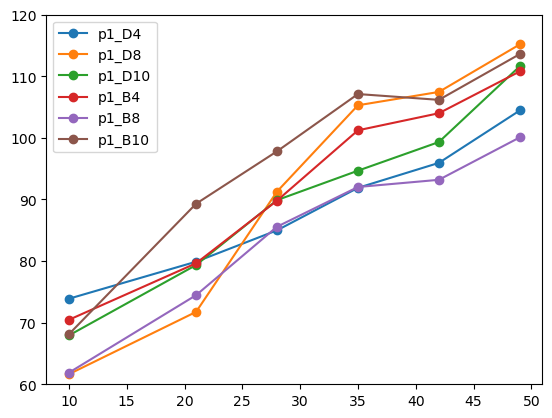

In [48]:
time = [10,21,28,35,42,49]
for i in range(1,7):
    sample=str(i)
    sample_name = "sample_"+str(sample)
    sample_timepoints = [x for x in df.index if x.endswith(sample_name)]
    sample_timepoints = list(meta.loc[sample_timepoints].sort_values(by='t_int').index)
    a = df.loc[sample2ID[sample],sample_timepoints]

    plt.plot(time,a,'-o',label=sample2ID[sample])
plt.legend()
plt.ylim([60,120])
plt.show()



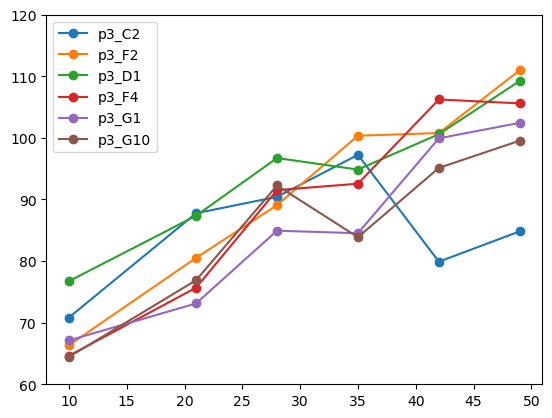

In [49]:
time = [10,21,28,35,42,49]
for i in range(7,13):
    sample=str(i)
    sample_name = "sample_"+str(sample)
    sample_timepoints = [x for x in df.index if x.endswith(sample_name)]
    sample_timepoints = list(meta.loc[sample_timepoints].sort_values(by='t_int').index)
    a = df.loc[sample2ID[sample],sample_timepoints]

    plt.plot(time,a,'-o',label=sample2ID[sample])
plt.legend()
plt.ylim([60,120])
plt.show()


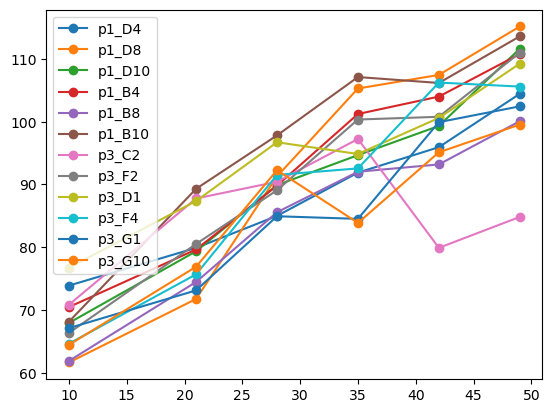

In [50]:
time = [10,21,28,35,42,49]
for i in range(1,13):
    sample=str(i)
    sample_name = "sample_"+str(sample)
    sample_timepoints = [x for x in df.index if x.endswith(sample_name)]
    sample_timepoints = list(meta.loc[sample_timepoints].sort_values(by='t_int').index)
    a = df.loc[sample2ID[sample],sample_timepoints]

    plt.plot(time,a,'-o',label=sample2ID[sample])
plt.legend()
plt.show()


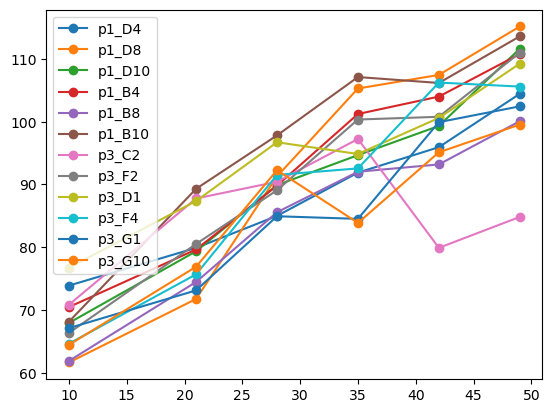

In [51]:
time = [10,21,28,35,42,49]
for sample in sample2ID.keys():
    sample_name = "sample_"+str(sample)
    sample_timepoints = [x for x in df.index if x.endswith(sample_name)]
    sample_timepoints = list(meta.loc[sample_timepoints].sort_values(by='t_int').index)
    a = df.loc[sample2ID[sample],sample_timepoints]

    plt.plot(time,a,'-o',label=sample2ID[sample])
plt.legend()
plt.show()


In [52]:
vsd_plot = vsd.loc[sample_markers_all,dendrogram_labels]
vsd_plot_Z = (vsd_plot.T-vsd_plot.T.mean())/vsd_plot.T.std()


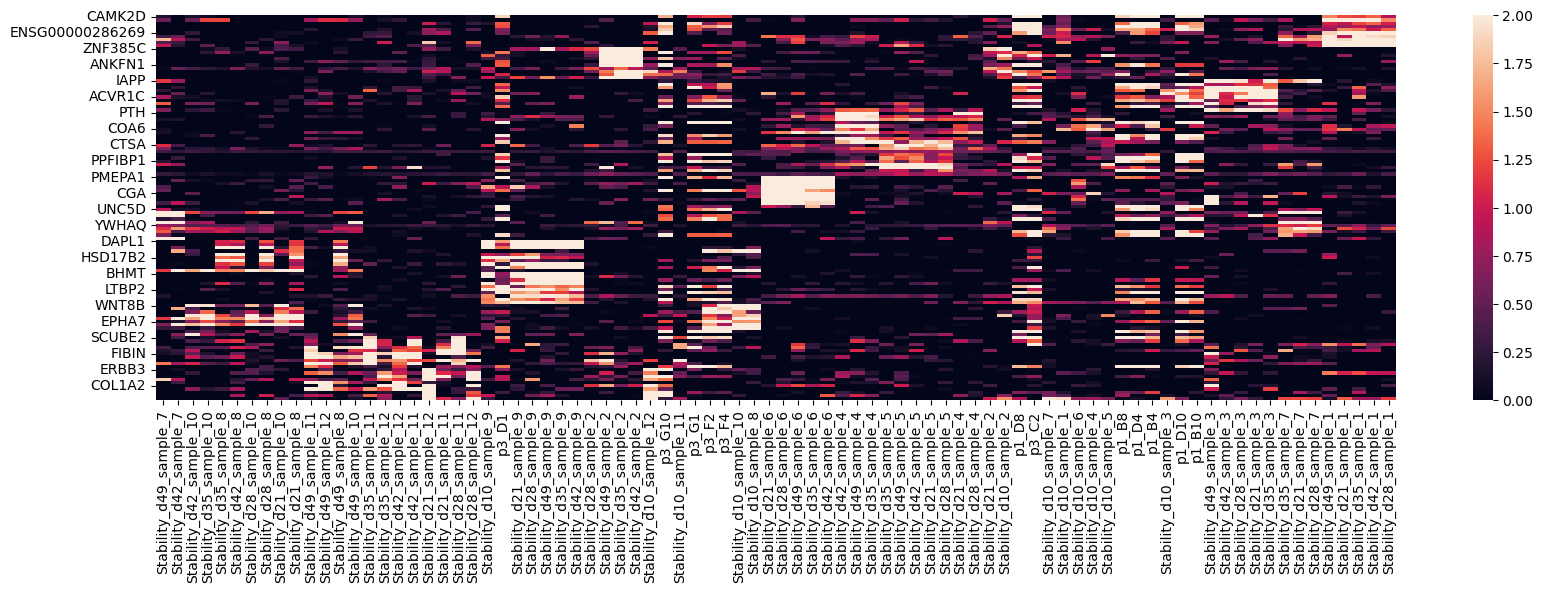

In [53]:
plt.figure(figsize=(20,5))
sns.heatmap(vsd_plot_Z.T,vmin=0,vmax=2)
plt.savefig("stability_plots/dendrogram_colored_by_sample_heatmap_markers_noFilter.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()


In [54]:
sorted_samples = list(meta.sort_values(by=['sample','t_int']).index)
sorted_samples = [x for x in sorted_samples if x in vsd.columns]

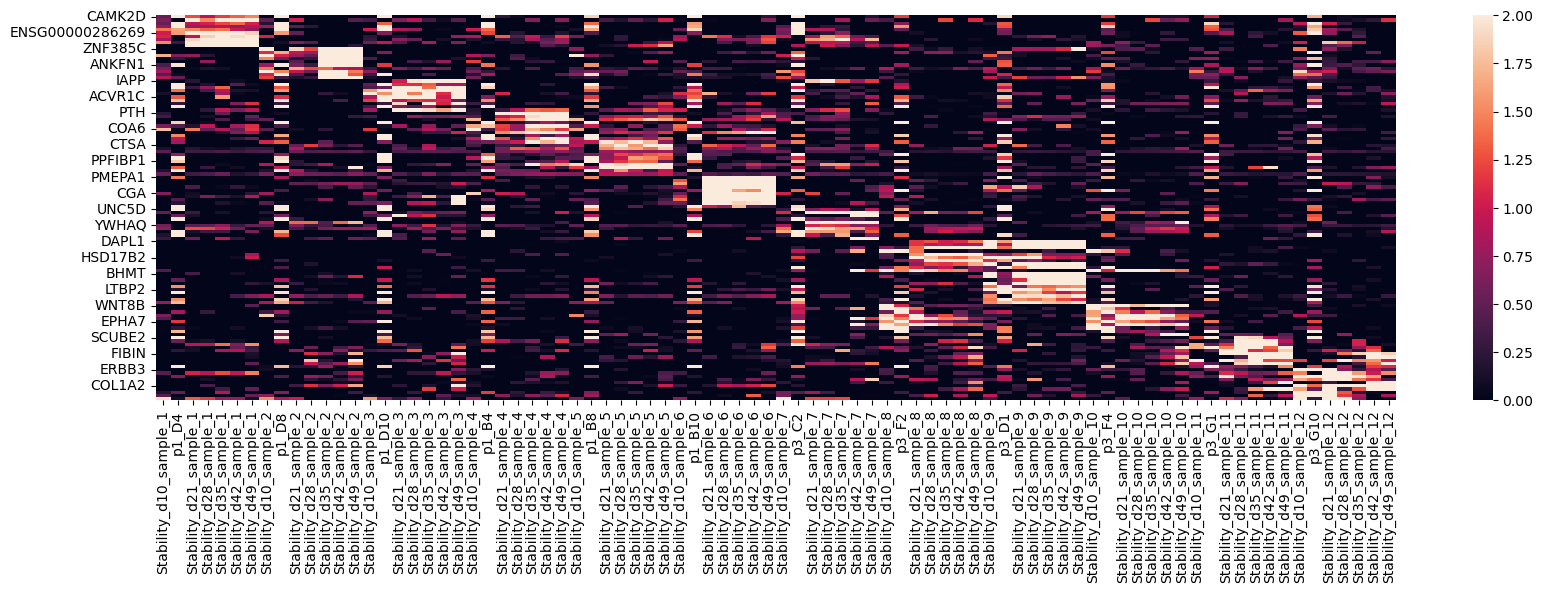

In [55]:
vsd_plot = vsd.loc[sample_markers_all,sorted_samples]
vsd_plot_Z = (vsd_plot.T-vsd_plot.T.mean())/vsd_plot.T.std()
plt.figure(figsize=(20,5))
sns.heatmap(vsd_plot_Z.T,vmin=0,vmax=2)
plt.savefig("stability_plots/sample_heatmap_markers_sorted_noFilter.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()


In [56]:
time_deseq2 = pd.read_csv("stability_plots/deseq2_time.tsv",sep="\t")
time_deseq2['signed_pval'] = np.sign(time_deseq2['log2FoldChange'])*-np.log10(time_deseq2['pvalue'])


In [57]:
early_genes = list(time_deseq2.sort_values(by='signed_pval').index[0:40])
late_genes = list(time_deseq2.sort_values(by='signed_pval',ascending=False).index[0:40])
time_genes = early_genes + late_genes


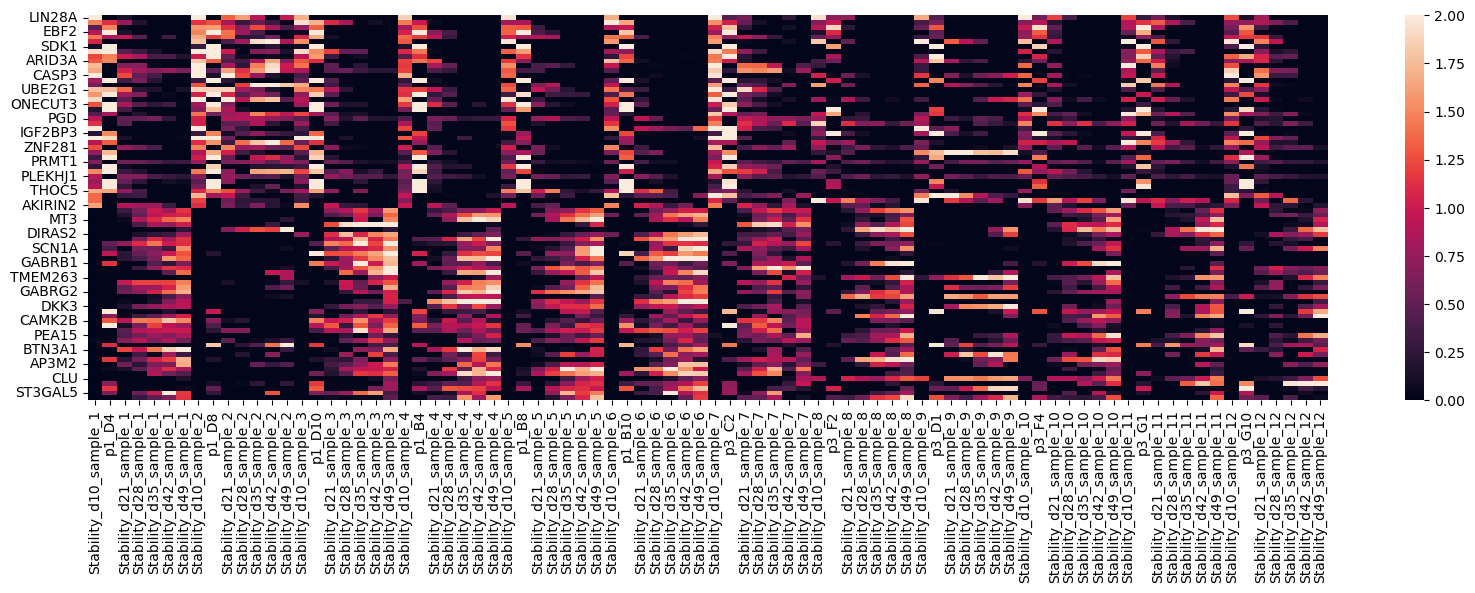

In [58]:
time_genes = [x for x in time_genes if x in vsd.index]
vsd_plot = vsd.loc[time_genes,sorted_samples]
vsd_plot_Z = (vsd_plot.T-vsd_plot.T.mean())/vsd_plot.T.std()
plt.figure(figsize=(20,5))
sns.heatmap(vsd_plot_Z.T,vmin=0,vmax=2)
plt.savefig("stability_plots/sample_heatmap_markers_time_sorted_noFilter.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()

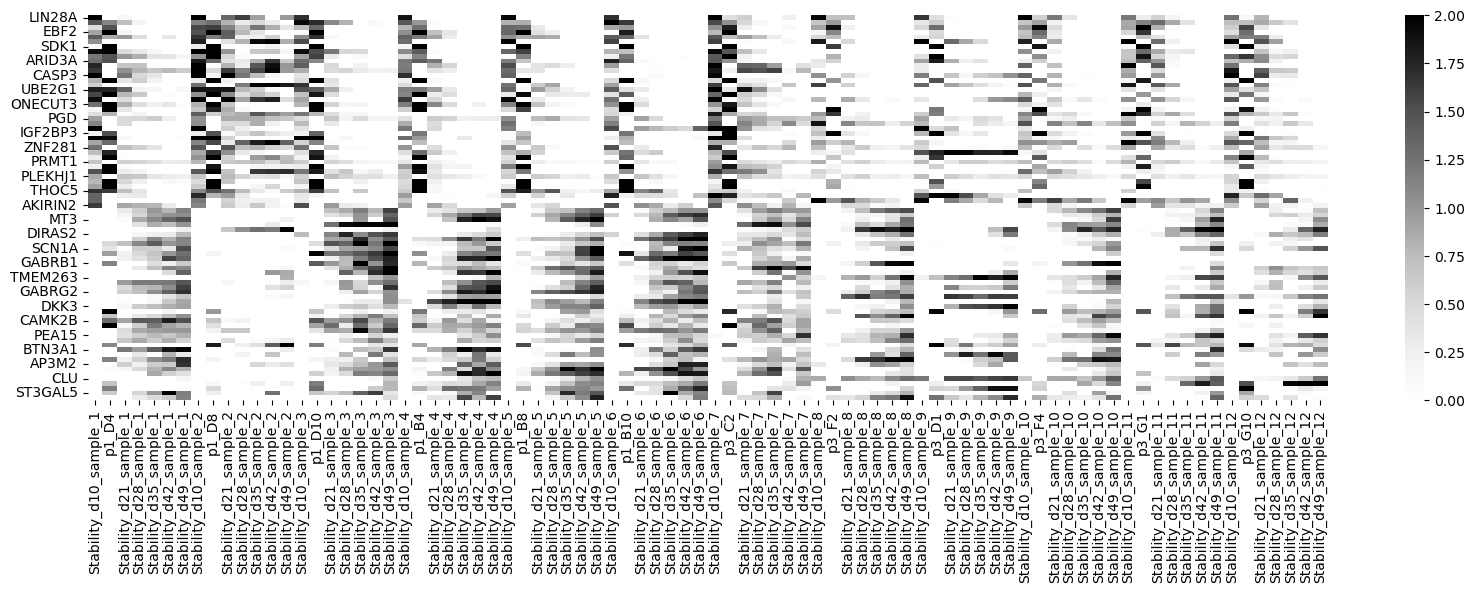

In [124]:
time_genes = [x for x in time_genes if x in vsd.index]
vsd_plot = vsd.loc[time_genes,sorted_samples]
vsd_plot_Z = (vsd_plot.T-vsd_plot.T.mean())/vsd_plot.T.std()
plt.figure(figsize=(20,5))
sns.heatmap(vsd_plot_Z.T,vmin=0,vmax=2,cmap='Greys')
plt.savefig("stability_plots/sample_heatmap_markers_time_sorted_noFilter_greys.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()

In [59]:
vsd_plot

Stability_d10_sample_1      p1_D4  Stability_d21_sample_1  \
LIN28A                 9.775930   6.073161                6.483012   
NR6A1                 10.800040  10.225066                9.551591   
LIN28B                 7.934108   9.245731                7.032580   
EBF2                   8.545875  11.554780                6.925230   
ARID3B                 8.402770   8.038417                8.111023   
...                         ...        ...                     ...   
CLU                    6.901399   4.304220                6.902743   
NFIB                   5.229702   7.156600                5.005264   
MGLL                   4.841430   6.574209                4.479013   
ST3GAL5                5.825691   6.847822                6.285813   
ZBTB38                 6.011386   6.805775                6.879892   

         Stability_d28_sample_1  Stability_d35_sample_1  \
LIN28A                 5.514256                5.239007   
NR6A1                  8.628752                8.008051   
LIN28B                 6.645205                6.396714   
EBF2                   6.302746                5.892928   
ARID3B                 7.775170                7.436365   
...                         ...                     ...   
CLU                    7.291771                7.985426   
NFIB                   5.427417                5.322776   
MGLL                   5.059196                5.543279   
ST3GAL5                6.797245                7.054781   
ZBTB38                 7.198517                7.295773   

         Stability_d42_sample_1  Stability_d49_sample_1  \
LIN28A                 4.668391                5.069348   
NR6A1                  7.916505                6.923825   
LIN28B                 6.039110                6.199502   
EBF2                   4.993288                5.069348   
ARID3B                 7.705453                7.193704   
...                         ...                     ...   
CLU                    8.104862                8.659494   
NFIB                   5.038237                5.188215   
MGLL                   5.376008                5.647547   
ST3GAL5                7.670035                7.168916   
ZBTB38                 7.379407                7.651957   

         Stability_d10_sample_2      p1_D8  Stability_d21_sample_2  ...  \
LIN28A                10.127115   5.803535                8.468631  ...   
NR6A1                 10.250927  10.452447                9.705554  ...   
LIN28B                 9.345645   9.397576                8.795111  ...   
EBF2                   9.780402  11.607947                9.625729  ...   
ARID3B                 8.555082   8.238692                8.366417  ...   
...                         ...        ...                     ...  ...   
CLU                    6.724112   4.828298                6.177511  ...   
NFIB                   4.511534   6.485413                4.859981  ...   
MGLL                   4.511534   6.023766                4.859981  ...   
ST3GAL5                6.027348   6.632019                5.856873  ...   
ZBTB38                 5.955402   6.344410                6.549425  ...   

         Stability_d35_sample_11  Stability_d42_sample_11  \
LIN28A                  4.813197                 4.636450   
NR6A1                   8.990599                 7.649781   
LIN28B                  6.893433                 6.402518   
EBF2                    6.471162                 5.760951   
ARID3B                  6.779585                 6.464915   
...                          ...                      ...   
CLU                     9.396426                10.138648   
NFIB                    7.884553                 8.455007   
MGLL                    4.672462                 5.177634   
ST3GAL5                 6.471162                 6.609594   
ZBTB38                  6.929423                 7.033138   

         Stability_d49_sample_11  Stability_d10_sample_12    p3_G10  \
LIN28A                  4.447245             

In [60]:
sc_markers_post = pd.read_csv("/home/jjanssens/jjans/analysis/iNeuron_morphogens/final/marker_genes/iGlut_post_dr_clustered_raw_merged_markers.tsv",sep="\t",index_col=0)
sc_markers_post.head()

sc_meta_post = pd.read_csv("/home/jjanssens/jjans/analysis/iNeuron_morphogens/final/scanpy/iGlut_post_dr_clustered_raw_merged_meta.tsv",sep="\t",index_col=0)
sc_meta_post.head()

sc_markers_pre = pd.read_csv("/home/jjanssens/jjans/analysis/iNeuron_morphogens/final/marker_genes/iGlut_pre_dr_clustered_raw_merged_markers.tsv",sep="\t",index_col=0)
sc_markers_pre.head()

sc_meta_pre = pd.read_csv("/home/jjanssens/jjans/analysis/iNeuron_morphogens/final/scanpy/iGlut_pre_dr_clustered_raw_merged_meta_fixed.tsv",sep="\t",index_col=0)
sc_meta_pre.head()

sample species  gene_count  tscp_count  mread_count bc1_well  \
01_01_41__s1  iGlut_pre    hg38        1456        2184         2946       A1   
01_01_68__s1  iGlut_pre    hg38        1693        2776         3762       A1   
01_01_76__s1  iGlut_pre    hg38        1454        2196         2981       A1   
01_01_83__s1  iGlut_pre    hg38        2391        4048         5592       A1   
01_01_92__s1  iGlut_pre    hg38         769        1076         1503       A1   

             bc2_well bc3_well  bc1_wind  bc2_wind  ...  M_CHIR  M_RA  M_FGF8  \
01_01_41__s1       A1       D5         1         1  ...     0.0     0       0   
01_01_68__s1       A1       F8         1         1  ...     0.0     0       0   
01_01_76__s1       A1       G4         1         1  ...     0.0     0       0   
01_01_83__s1       A1      G11         1         1  ...     0.0     0       0   
01_01_92__s1       A1       H8         1         1  ...     0.0     0       0   

              M_BMP4  M_SHH  M_PM     tSNE_1     tSNE_2     umap_1    umap_2  
01_01_41__s1      50      0     0  10.189884  39.231434  13.276781 -0.856798  
01_01_68__s1      50      0     0  25.132082  32.402280  14.830362  5.908925  
01_01_76__s1      50      0     0   5.797632  52.208040  16.393394 -1.702099  
01_01_83__s1      50      0     0   6.855360  43.492870  13.618956 -2.668232  
01_01_92__s1      50      0     0  25.081343  29.805347  14.698254  5.868345  

[5 rows x 50 columns]

In [61]:
sample2ID = {
    '1': 'p1_D4',
    '2': 'p1_D8',
    '3': 'p1_D10',
    '4': 'p1_B4',
    '5': 'p1_B8',
    '6': 'p1_B10',
    '7': 'p3_C2',
    '8': 'p3_F2',
    '9': 'p3_D1',
    '10': 'p3_F4',
    '11': 'p3_G1',
    '12': 'p3_G10'}


In [62]:
meta_sorted = meta.sort_values(by=['sample','t_int'])
samples = list(set(meta_sorted['sample']))
samples = [str(x) for x in samples]

In [63]:
sc_markers_post = sc_markers_post.loc[sc_markers_post['logfoldchanges']>0].copy()
sc_markers_pre = sc_markers_pre.loc[sc_markers_pre['logfoldchanges']>0].copy()


In [107]:
sample_markers_all_sc = []
all_markers_plot_post = []
all_markers_plot_pre = []

sample_markers_all_sc_dict = {}



for sample in samples:
    sample_ID = sample2ID[sample]
    sample_markers = []
    if 'p1' in sample_ID:
        sample_clusters = list(sc_meta_post.loc[sc_meta_post['parse_id']==sample_ID,'final_clustering'].value_counts().head(n=3).index)

        for cluster in sample_clusters:
            cluster_markers = list(sc_markers_post.loc[sc_markers_post['cluster_old']==cluster].index[0:10])
            cluster_markers = [x for x in cluster_markers if x in vsd.index]
            sample_markers_all_sc = sample_markers_all_sc + cluster_markers
            all_markers_plot_post = all_markers_plot_post + cluster_markers
            sample_markers = sample_markers + cluster_markers
        sample_markers_all_sc_dict[sample] = sample_markers
    if 'p3' in sample_ID:
        sample_clusters = list(sc_meta_pre.loc[sc_meta_pre['parse_id']==sample_ID,'final_clustering'].value_counts().head(n=3).index)
        for cluster in sample_clusters:
            cluster_markers = list(sc_markers_pre.loc[sc_markers_pre['cluster_old']==cluster].index[0:10])
            cluster_markers = [x for x in cluster_markers if x in vsd.index]

            sample_markers_all_sc = sample_markers_all_sc + cluster_markers
            all_markers_plot_pre = all_markers_plot_pre + cluster_markers
            sample_markers = sample_markers + cluster_markers
        sample_markers_all_sc_dict[sample] = sample_markers


In [106]:
sample_markers_all_sc_dict

{}

In [65]:
len(samples)

12

In [66]:
sample_markers_all_sc_set = (list(set(sample_markers_all_sc)))

with open('sample_markers_all_sc_set_top3_10genes.txt', 'w') as f:
    for line in sample_markers_all_sc_set:
        f.write(f"{line}\n")

In [67]:
len(sample_markers_all_sc_set)

215

In [68]:
sample_markers_all_bulk = []
for i in set(meta['sample']):
    marker_df = pd.read_csv("stability_plots/"+str(i)+"_deseq2.tsv",sep="\t",index_col=0)
    marker_df_pos = marker_df.loc[marker_df['log2FoldChange']>0]
    marker_df_pos_sig = marker_df_pos.sort_values(by='padj')
    sample_markers = list(marker_df_pos_sig.head(n=300).index)
    sample_markers_all_bulk = sample_markers_all_bulk + sample_markers


In [69]:
sample_markers_all_bulk_sc = [x for x in sample_markers_all_bulk if x in sample_markers_all_sc_set]
sample_markers_all_bulk_sc = (list(set(sample_markers_all_bulk_sc)))

with open('sample_markers_all_sc_set_top3_10genes_bulk.txt', 'w') as f:
    for line in sample_markers_all_bulk_sc:
        f.write(f"{line}\n")

In [70]:
len(sample_markers_all_bulk_sc)

99

In [112]:
sorted_samples = list(meta.sort_values(by=['sample','t_int']).index)
sorted_samples = [x for x in sorted_samples if x in vsd.columns]
sorted_samples_d28 = [x for x in sorted_samples if 'd28' in x]
sorted_samples_d10 = [x for x in sorted_samples if 'd10' in x]


In [113]:
post_samples = [x for x in sorted_samples if 'p1' in x]
pre_samples = [x for x in sorted_samples if 'p3' in x]
sc_samples = post_samples + pre_samples

sorted_samples_bulk = [x for x in sorted_samples if x not in sc_samples]

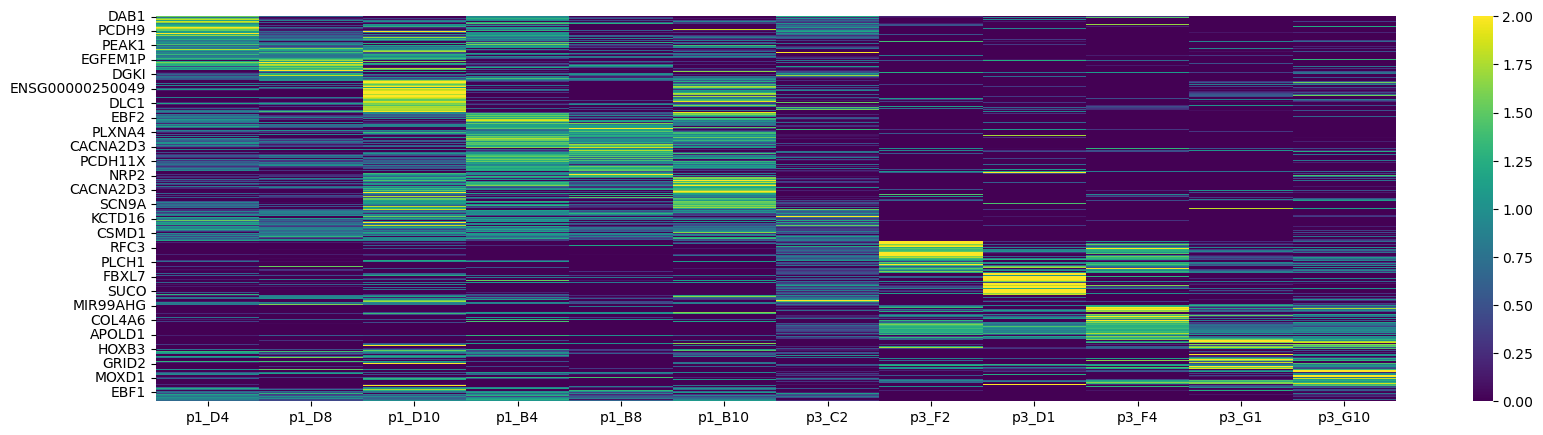

In [114]:
vsd_plot = vsd.loc[sample_markers_all_sc,sc_samples]
vsd_plot_Z = (vsd_plot.T-vsd_plot.T.mean())/vsd_plot.T.std()
plt.figure(figsize=(20,5))
sns.heatmap(vsd_plot_Z.T,vmin=0,vmax=2,cmap='viridis')
#plt.savefig("stability_plots/sample_heatmap_markers_sorted.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()



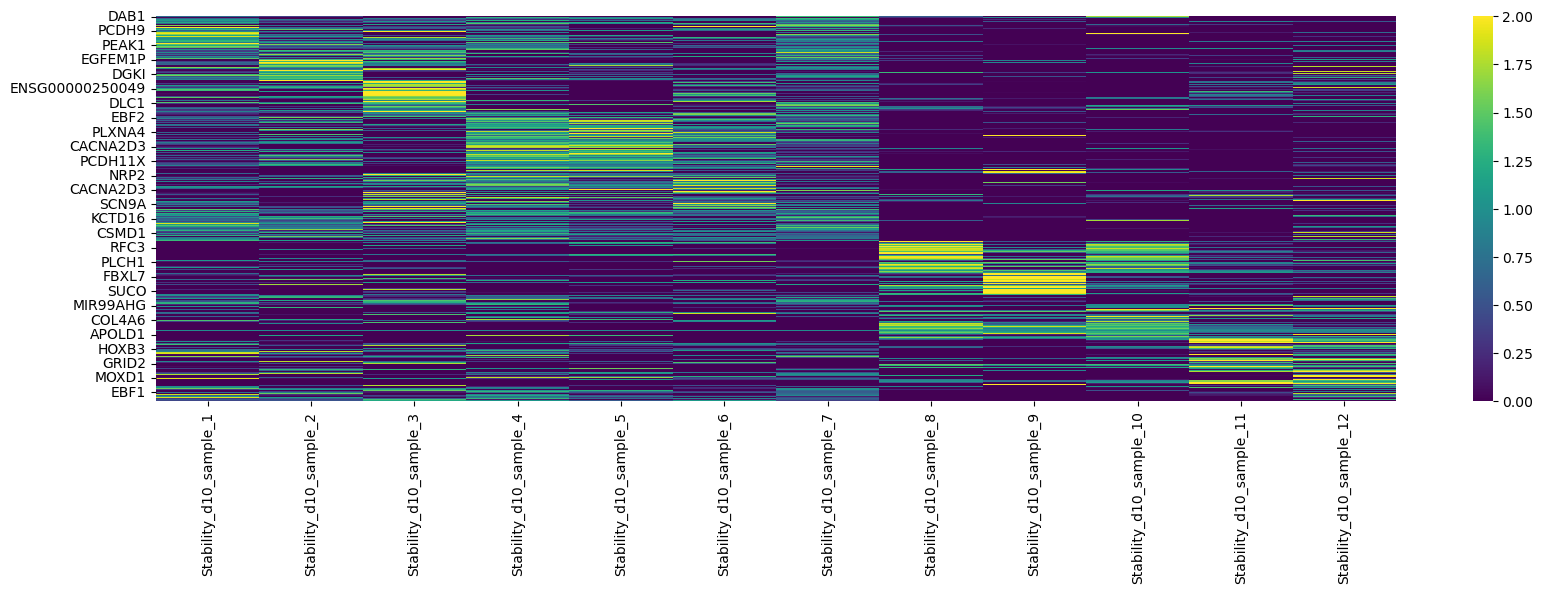

In [115]:
vsd_plot = vsd.loc[sample_markers_all_sc,sorted_samples_d10]
vsd_plot_Z = (vsd_plot.T-vsd_plot.T.mean())/vsd_plot.T.std()
plt.figure(figsize=(20,5))
sns.heatmap(vsd_plot_Z.T,vmin=0,vmax=2,cmap='viridis')
#plt.savefig("stability_plots/sample_heatmap_markers_sorted.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()



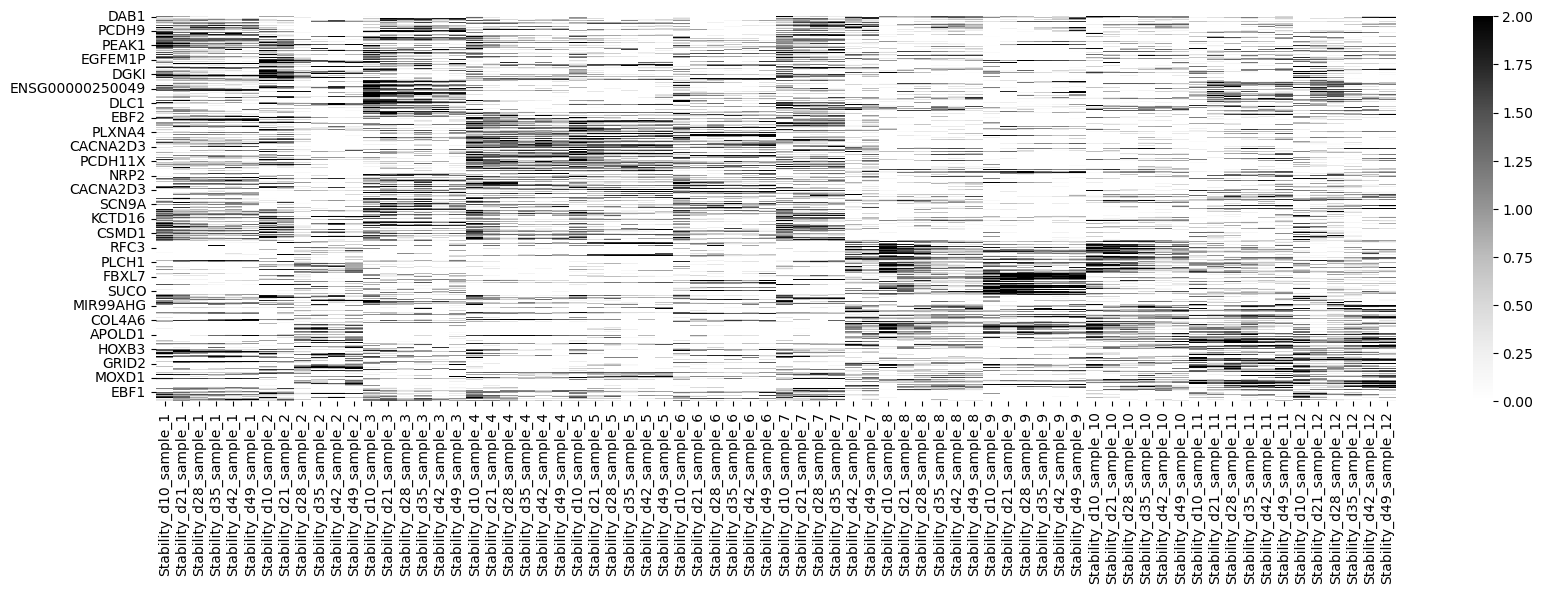

In [126]:
vsd_plot = vsd.loc[sample_markers_all_sc,sorted_samples_bulk]
vsd_plot_Z = (vsd_plot.T-vsd_plot.T.mean())/vsd_plot.T.std()
plt.figure(figsize=(20,5))
sns.heatmap(vsd_plot_Z.T,vmin=0,vmax=2,cmap='Greys')
plt.savefig("stability_plots/sample_heatmap_markers_sorted_greys.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()



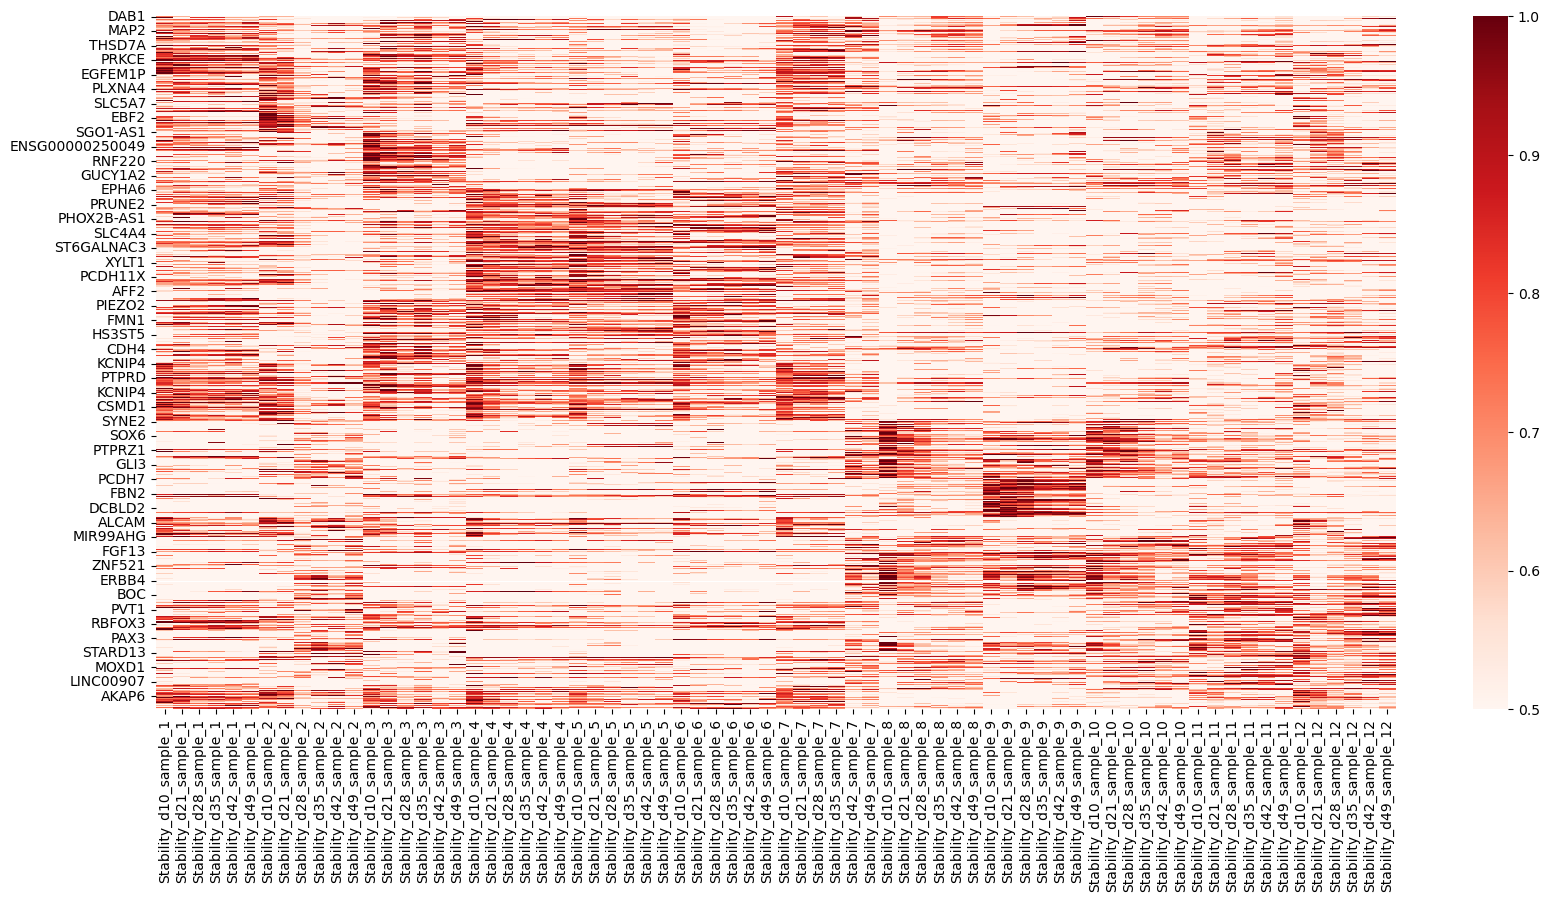

In [117]:
vsd_plot_minmax = (vsd_plot.T-vsd_plot.T.min())/(vsd_plot.T.max()-vsd_plot.T.min())
vsd_plot_minmax = vsd_plot_minmax.T

plt.figure(figsize=(20,9))
sns.heatmap(vsd_plot_minmax,vmin=0.5,vmax=1,cmap='Reds')
#plt.savefig("stability_plots/"+genotype+"_heatmap_minmax_1_0.5.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()

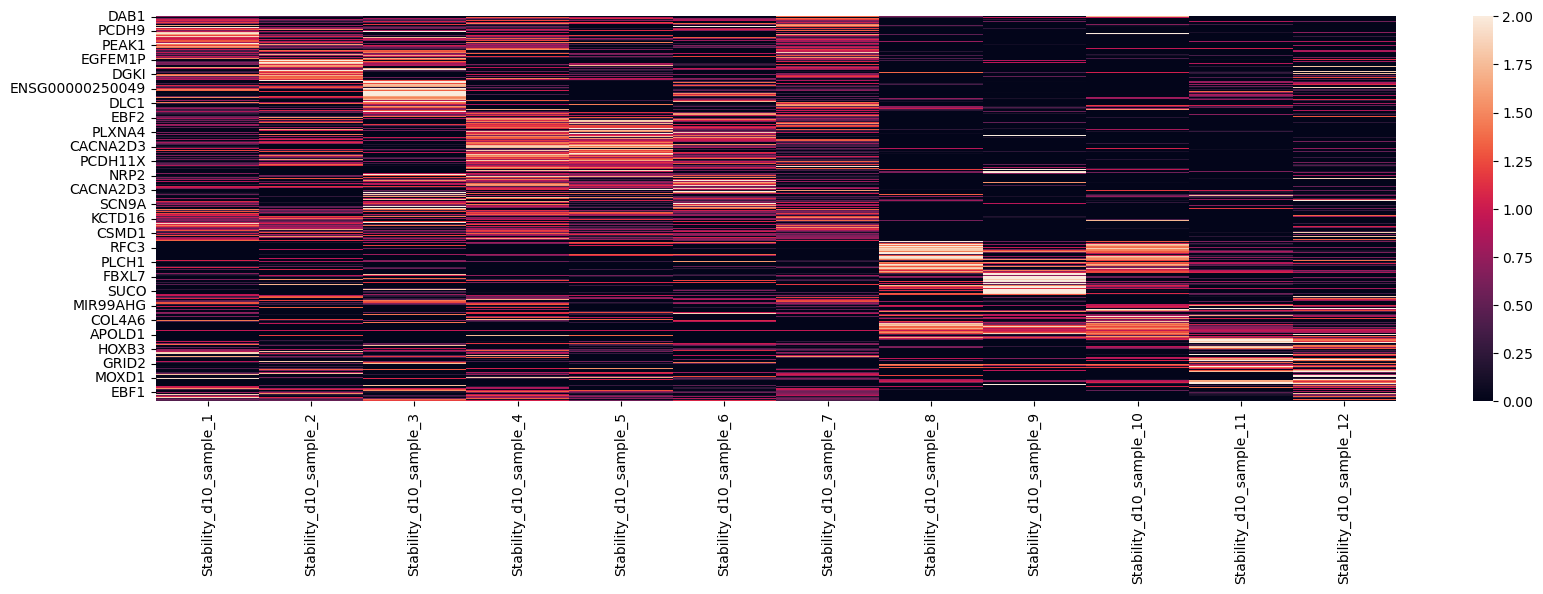

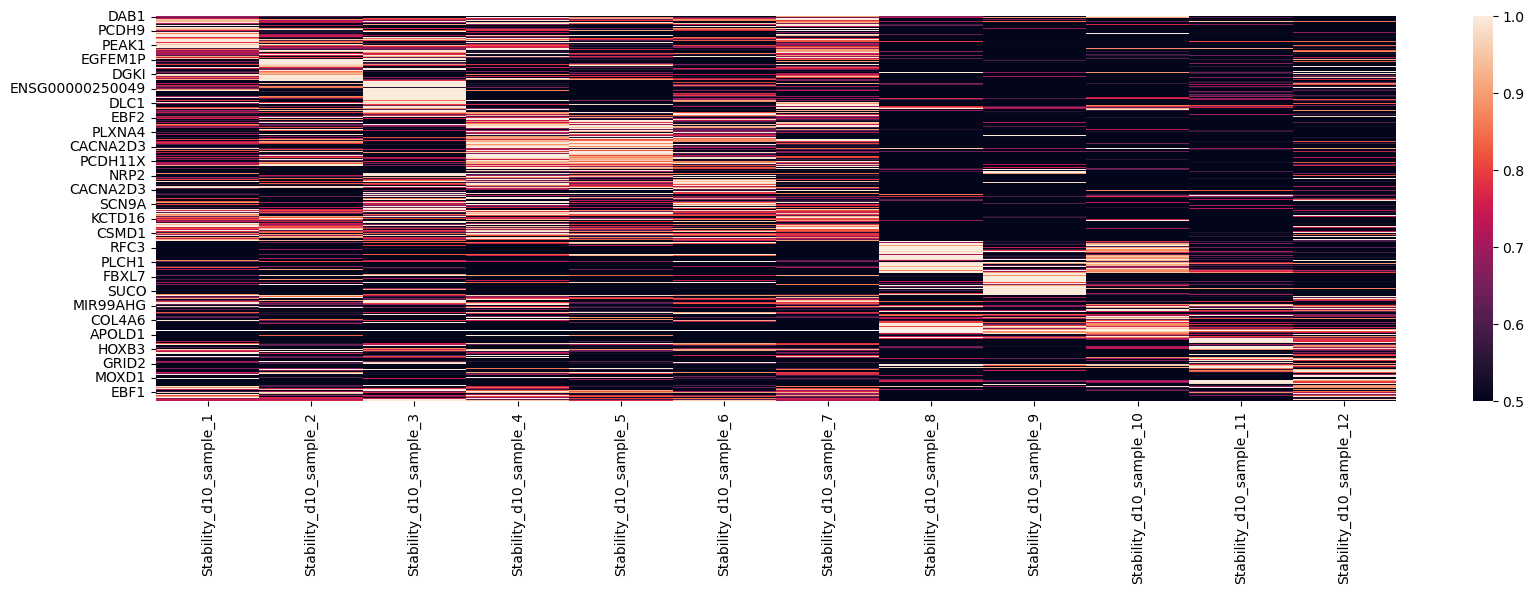

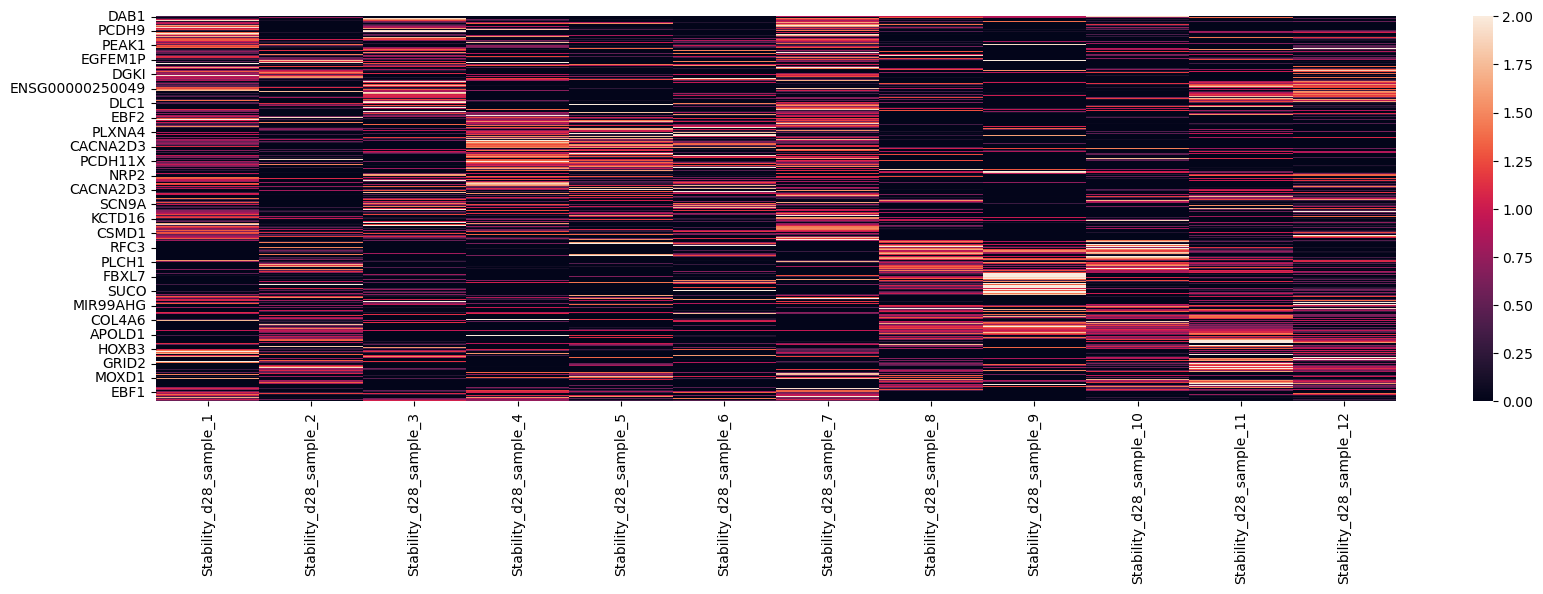

In [118]:
vsd_plot = vsd.loc[sample_markers_all_sc,sorted_samples_d10]
vsd_plot_Z = (vsd_plot.T-vsd_plot.T.mean())/vsd_plot.T.std()
plt.figure(figsize=(20,5))
sns.heatmap(vsd_plot_Z.T,vmin=0,vmax=2)
#plt.savefig("stability_plots/sample_heatmap_markers_sorted.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()

vsd_plot_minmax = (vsd_plot.T-vsd_plot.T.min())/(vsd_plot.T.max()-vsd_plot.T.min())
vsd_plot_minmax = vsd_plot_minmax.T
plt.figure(figsize=(20,5))
sns.heatmap(vsd_plot_minmax,vmin=0.5,vmax=1)
#plt.savefig("stability_plots/sample_heatmap_markers_sorted.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()


vsd_plot = vsd.loc[sample_markers_all_sc,sorted_samples_d28]
vsd_plot_Z = (vsd_plot.T-vsd_plot.T.mean())/vsd_plot.T.std()
plt.figure(figsize=(20,5))
sns.heatmap(vsd_plot_Z.T,vmin=0,vmax=2)
#plt.savefig("stability_plots/sample_heatmap_markers_sorted.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()



In [119]:
sample_markers_all_sc = []
all_markers_plot_post = []
all_markers_plot_pre = []
sample_markers_all_sc_dict = {}

for sample in samples:
    sample_ID = sample2ID[sample]
    sample_markers = []
    if 'p1' in sample_ID:
        sample_clusters = list(sc_meta_post.loc[sc_meta_post['parse_id']==sample_ID,'final_clustering'].value_counts().head(n=3).index)

        for cluster in sample_clusters:
            cluster_markers = list(sc_markers_post.loc[sc_markers_post['cluster_old']==cluster].index[0:20])
            cluster_markers = [x for x in cluster_markers if x in vsd.index]
            sample_markers_all_sc = sample_markers_all_sc + cluster_markers
            all_markers_plot_post = all_markers_plot_post + cluster_markers
            sample_markers = sample_markers + cluster_markers
        sample_markers_all_sc_dict[sample] = sample_markers
    if 'p3' in sample_ID:
        sample_clusters = list(sc_meta_pre.loc[sc_meta_pre['parse_id']==sample_ID,'final_clustering'].value_counts().head(n=3).index)
        for cluster in sample_clusters:
            cluster_markers = list(sc_markers_pre.loc[sc_markers_pre['cluster_old']==cluster].index[0:20])
            cluster_markers = [x for x in cluster_markers if x in vsd.index]

            sample_markers_all_sc = sample_markers_all_sc + cluster_markers
            all_markers_plot_pre = all_markers_plot_pre + cluster_markers
            sample_markers = sample_markers + cluster_markers
        sample_markers_all_sc_dict[sample] = sample_markers


In [120]:
sample_markers_all_bulk = []
for i in set(meta['sample']):
    marker_df = pd.read_csv("stability_plots/"+str(i)+"_deseq2.tsv",sep="\t",index_col=0)
    marker_df_pos = marker_df.loc[marker_df['log2FoldChange']>0]
    marker_df_pos_sig = marker_df_pos.sort_values(by='padj')
    sample_markers = list(marker_df_pos_sig.head(n=500).index)
    sample_markers_all_bulk = sample_markers_all_bulk + sample_markers


In [121]:
sample_markers_all_bulk_sc = [x for x in sample_markers_all_bulk if x in sample_markers_all_sc]

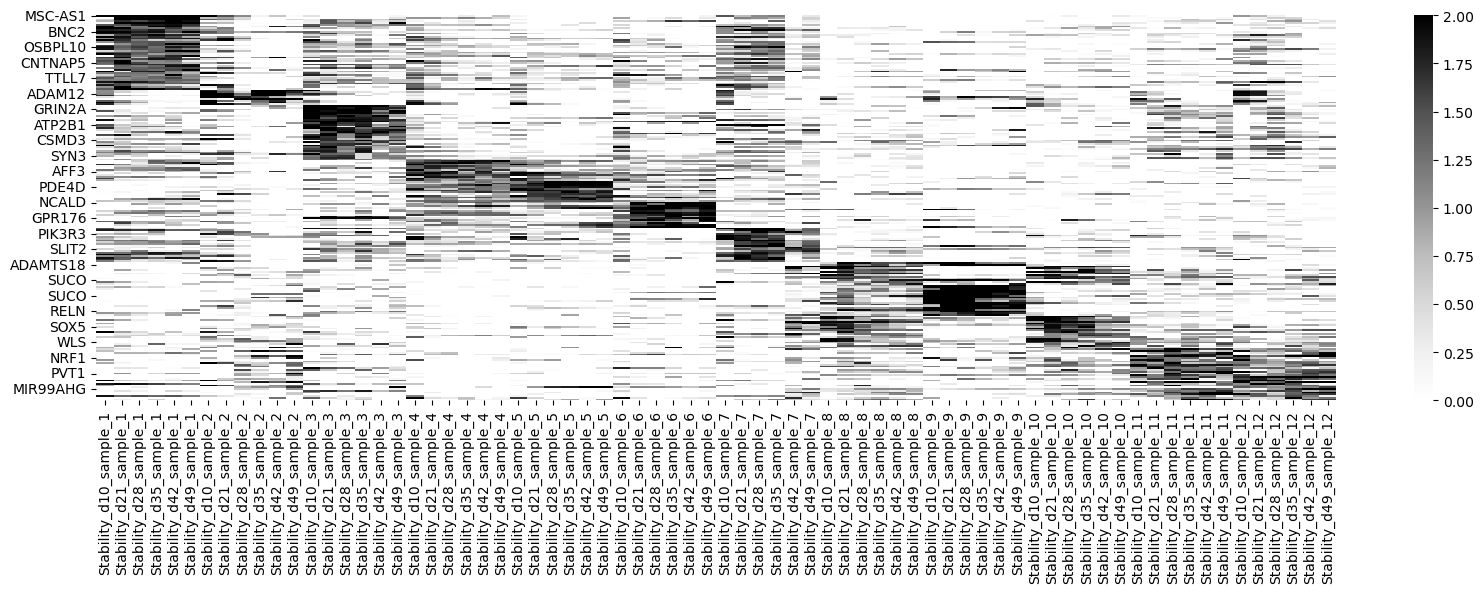

In [127]:
vsd_plot = vsd.loc[sample_markers_all_bulk_sc,sorted_samples_bulk]
vsd_plot_Z = (vsd_plot.T-vsd_plot.T.mean())/vsd_plot.T.std()
plt.figure(figsize=(20,5))
sns.heatmap(vsd_plot_Z.T,vmin=0,vmax=2,cmap='Greys')
plt.savefig("stability_plots/sample_heatmap_markers_sorted_stable_greys.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()

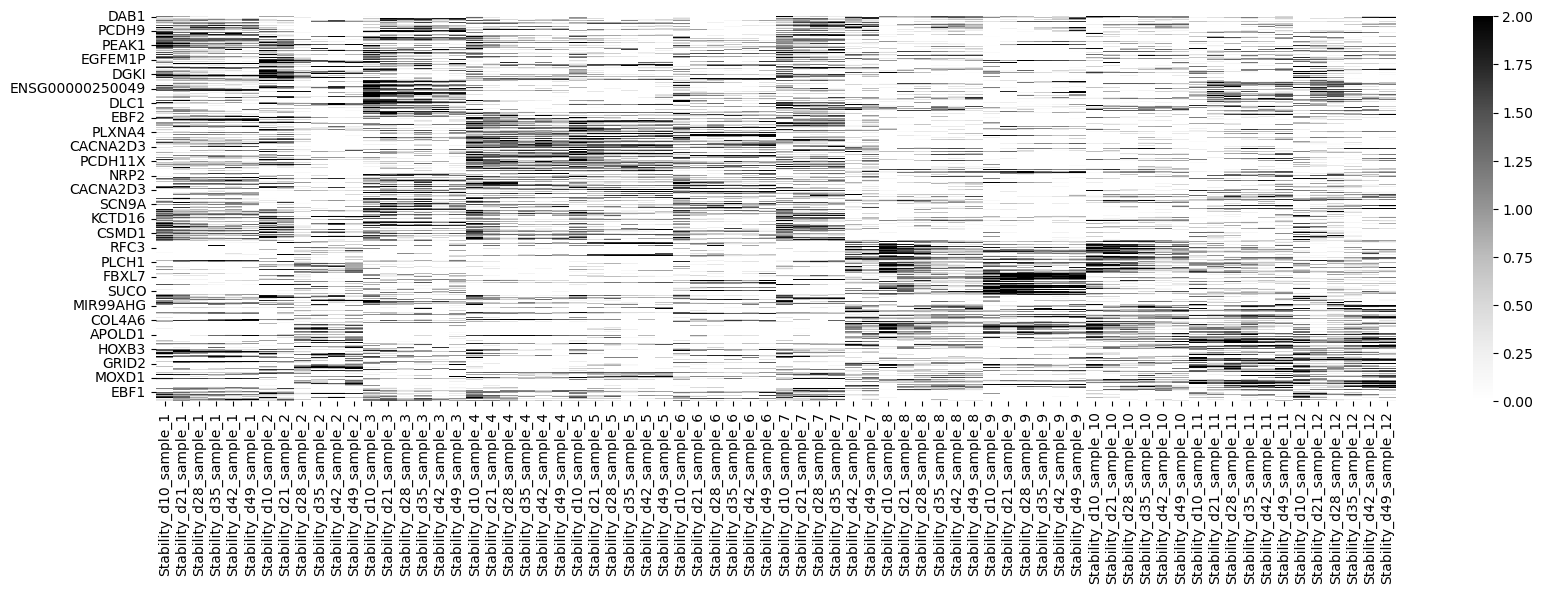

In [128]:
vsd_plot = vsd.loc[sample_markers_all_sc,sorted_samples_bulk]
vsd_plot_Z = (vsd_plot.T-vsd_plot.T.mean())/vsd_plot.T.std()
plt.figure(figsize=(20,5))
sns.heatmap(vsd_plot_Z.T,vmin=0,vmax=2,cmap='Greys')
#plt.savefig("stability_plots/sample_heatmap_markers_sorted_stable_greys.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()

In [103]:
sample_points = list(meta.loc[meta['sample']==1].index)
sample_points = [x for x in sample_points if x not in sc_samples]
sample_points = sorted(sample_points)

In [98]:
vsd_plot.loc[sample_points]

Stability_d10_sample_1  Stability_d21_sample_1  \
LINC03000                      5.748602                7.151488   
CACHD1                         7.168974                7.710261   
ENSG00000253693                4.260132                5.549063   
BNC2                           8.705203                8.158784   
PEAK1                          9.305359                8.881835   
...                                 ...                     ...   
MIR99AHG                       5.004564                4.780813   
TSHZ2                          6.758390                7.132350   
GRID2                          4.478583                4.479013   
MEGF10                         4.260132                3.722420   
THSD7A                         9.301122                8.732227   

                 Stability_d28_sample_1  Stability_d35_sample_1  \
LINC03000                      7.210514                7.653303   
CACHD1                         7.613581                7.737063   
ENSG00000253693                5.471617                5.608695   
BNC2                           7.934823                8.084543   
PEAK1                          8.444281                7.973978   
...                                 ...                     ...   
MIR99AHG                       4.852198                5.670845   
TSHZ2                          6.919805                6.498078   
GRID2                          3.722420                4.676985   
MEGF10                         3.722420                4.506431   
THSD7A                         8.939054                8.759847   

                 Stability_d42_sample_1  Stability_d49_sample_1  \
LINC03000                      7.880841                7.481876   
CACHD1                         8.489714                7.819878   
ENSG00000253693                5.528224                5.791955   
BNC2                           7.608982                8.277284   
PEAK1                          8.223400                8.144610   
...                                 ...                     ...   
MIR99AHG                       5.469626                5.721799   
TSHZ2                          7.249078                6.953253   
GRID2                          4.085444                4.342126   
MEGF10                         3.722420                4.342126   
THSD7A                         8.890839                8.577716   

                 Stability_d10_sample_2  Stability_d21_sample_2  \
LINC03000                      6.528632                6.280393   
CACHD1                         6.710011                6.864116   
ENSG00000253693                4.683127                4.612396   
BNC2                           7.494150                7.102868   
PEAK1                          8.807559                9.142788   
...                                 ...                     ...   
MIR99AHG                       4.407897                6.026846   
TSHZ2                          6.512391                6.141401   
GRID2                          4.825307                4.452834   
MEGF10                         4.283840                4.452834   
THSD7A                         8.069632                7.787177   

                 Stability_d28_sample_2  Stability_d35_sample_2  ...  \
LINC03000                      5.698154                5.202722  ...   
CACHD1                         6.725512                6.548402  ...   
ENSG00000253693                4.139436                4.235084  ...   
BNC2                           6.694409                7.126090  ...   
PEAK1                          7.946574                7.382354  ...   
...                                 ...                     ...  ...   
MIR99AHG                       7.124510                6.958581  ...   
TSHZ2                          4.941258                5.920763  ...   
GRID2                          4.642476                3.722420  ...   
MEGF10                         5.730726                5.471495  ...   
THSD7

In [131]:
stable_markers = sample_markers_all_bulk_sc
sc_markers_all = sample_markers_all_sc
time_genes = time_genes

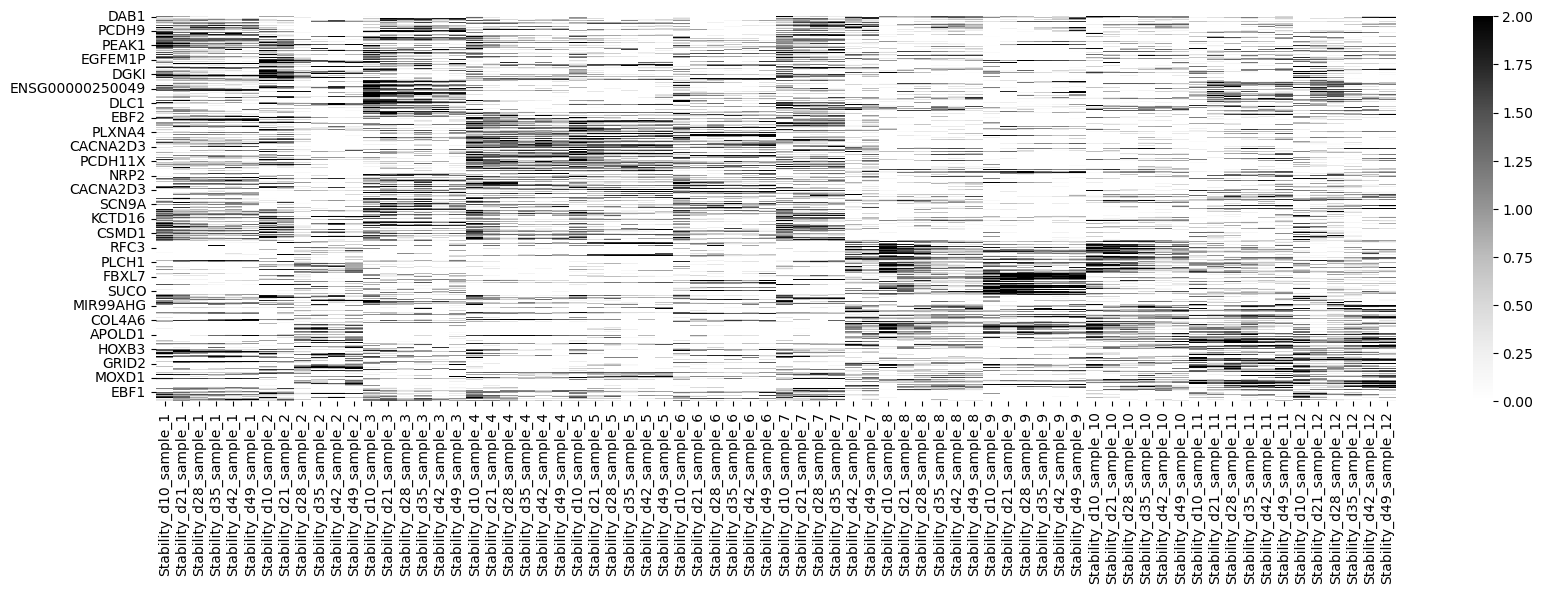

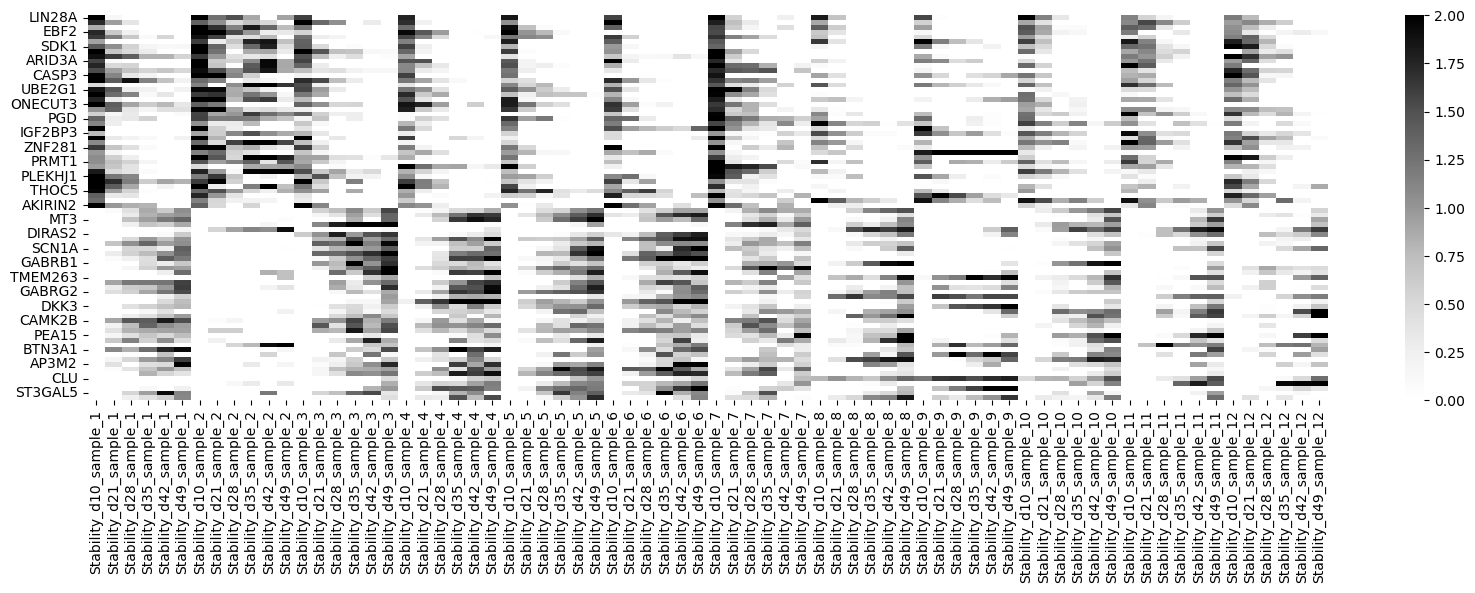

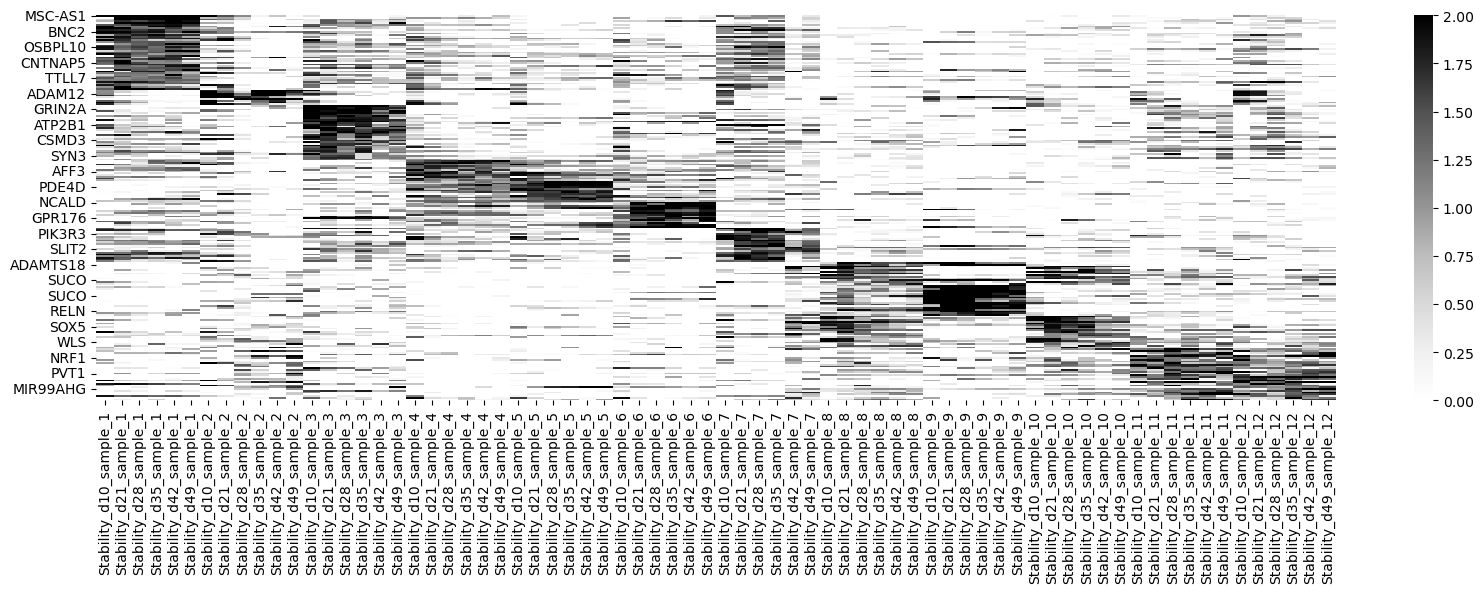

In [133]:
vsd_plot = vsd.loc[sc_markers_all,sorted_samples_bulk]
vsd_plot_Z = (vsd_plot.T-vsd_plot.T.mean())/vsd_plot.T.std()
plt.figure(figsize=(20,5))
sns.heatmap(vsd_plot_Z.T,vmin=0,vmax=2,cmap='Greys')
#plt.savefig("stability_plots/sample_heatmap_markers_sorted_stable_greys.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()

vsd_plot = vsd.loc[time_genes,sorted_samples_bulk]
vsd_plot_Z = (vsd_plot.T-vsd_plot.T.mean())/vsd_plot.T.std()
plt.figure(figsize=(20,5))
sns.heatmap(vsd_plot_Z.T,vmin=0,vmax=2,cmap='Greys')
#plt.savefig("stability_plots/sample_heatmap_markers_sorted_stable_greys.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()

vsd_plot = vsd.loc[stable_markers,sorted_samples_bulk]
vsd_plot_Z = (vsd_plot.T-vsd_plot.T.mean())/vsd_plot.T.std()
plt.figure(figsize=(20,5))
sns.heatmap(vsd_plot_Z.T,vmin=0,vmax=2,cmap='Greys')
#plt.savefig("stability_plots/sample_heatmap_markers_sorted_stable_greys.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()

In [134]:
def qualheatmap(df,color_dict,figsize=(10,10),ax_heatmap=None):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap
    import seaborn as sns
    
    available_keys = []
    for col in df.columns:
        df_col_values = list(set(df[col]))
        available_keys = available_keys + df_col_values
    available_keys = list(set(available_keys))
    
    color_dict_annot = {}
    for key in available_keys:
        try:
            color_dict_annot[key] = color_dict[key]
        except:
            print(key+" has no matching color in color_dict")
    
    
    # Create a unique list of colors based on the color_dict
    unique_colors = np.unique(list(color_dict_annot.values()))
    unique_colors = [x for x in unique_colors if x!='#000000']

    # Create a custom colormap using ListedColormap
    cmap = ListedColormap(unique_colors)

    # Map categorical values to integer values
    value_mapping = {category: i for i, category in enumerate(unique_colors)}
    mapped_data = df.applymap(lambda x: value_mapping.get(color_dict_annot.get(x, 'white')))

    # Create the heatmap using seaborn
    if not ax_heatmap:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        print('adding on existing axis')

    heatmap = sns.heatmap(mapped_data,
                        cmap=cmap,
                        ax = ax_heatmap,
                        cbar=False) 
    # alternative: use imshow to plot heatmap
    #    heatmap = plt.imshow(mapped_data, cmap=cmap)

    # Set axis labels and title
    plt.xticks(np.arange(len(df.columns)), df.columns)
    plt.yticks(np.arange(len(df)), df.index)
    
    if not ax_heatmap:
        return fig
    

In [177]:
color_dict = {}
#color_dict['M_SHH'] = ['w',"#C2D9F7", "#98C1F0", "#4782DD", "#1D52A1"]
#color_dict['M_RA'] = ['w', "#aadce0","#72bcd5", "#528fad", "#376795"]
#color_dict['M_BMP4'] = ['w', "#ffe6b7", "#ffd353","#ffb242"]
#color_dict['M_XAV'] = ['w', "#f9b4c9","#d8527c","#9a133d"]
#color_dict['M_CHIR'] = ['w',"#dec5da", "#b695bc", "#90719f", "#574571"]
#color_dict['M_FGF8'] = ['w','#ffbbff','#ee7ae9','#b452cd','#8b008b']

color_dict['RA_4'] = "#376795"
color_dict['RA_3'] =  "#528fad"
color_dict['RA_2'] = "#72bcd5"
color_dict['RA_1'] = "#aadce0"

color_dict['BMP4_3'] = "#ffb242"
color_dict['BMP4_2'] = "#ffd353"
color_dict['BMP4_1'] = "#ffe6b7"

color_dict['XAV_3'] = "#9a133d"
color_dict['XAV_2'] = "#d8527c"
color_dict['XAV_1'] = "#f9b4c9"

color_dict['FGF8_1'] ='#ffbbff'
color_dict['FGF8_2'] ='#ee7ae9'
color_dict['FGF8_3'] ='#b452cd'
color_dict['FGF8_4'] ='#8b008b'

color_dict['CHIR_1'] = "#dec5da"
color_dict['CHIR_2'] = "#b695bc"
color_dict['CHIR_3'] = "#90719f"
color_dict['CHIR_4'] = "#574571"

color_dict['SHH_1'] = "#C2D9F7"
color_dict['SHH_2'] = "#98C1F0"
color_dict['SHH_3'] = "#4782DD"
color_dict['SHH_4'] = "#1D52A1"

color_dict['RA_4_CHIR'] = "#3c7c3d"
color_dict['RA_3_CHIR'] = "#669d62"
color_dict['RA_2_CHIR'] = "#9cc184"
color_dict['RA_1_CHIR'] = "#c2d6a4"

color_dict['FGF8_1_CHIR'] = "#cccccc"
color_dict['FGF8_2_CHIR'] = "#999999"
color_dict['FGF8_3_CHIR'] = "#666666"
color_dict['FGF8_4_CHIR'] = "#333333"


color_dict['XAV_3_FGF8'] = "#D8527C"
color_dict['RA_3_FGF8'] = "#183E6B"
color_dict['CHIR_2_FGF8'] = "#90719F"

color_dict['CycA'] = '#659E62'
color_dict['ctrl'] = '#FFFFFF'

color_dict['N2B27_SB_CHIR'] = '#102A4D'
color_dict['N2B27_2Si'] = '#8DC7DD'
color_dict['NIM'] = '#4E835E'


color_dict['mTeSR'] = '#CBCCCC'
color_dict['Other'] = '#CBCCCC'

color_dict['NGN2'] = 'royalblue'
color_dict['ASCL1'] = 'crimson'
color_dict['post'] = 'black'
color_dict['pre'] = 'white'

#col_FGF8 <- c("plum1", "orchid2", "mediumorchid3", "magenta4")
#col_RA_CHIR <- c("#3c7c3d", "#669d62", "#9cc184", "#c2d6a4")
#col_FGF8_CHIR <- c("gray80", "gray60", "gray40", "gray20")

#col_DV <- c("#ffb242", "#ffd353", "#ffe6b7", "gray90", "#C2D9F7", "#98C1F0", "#4782DD", "#1D52A1")
#col_AP <- c(col_XAV, "gray90", col_CHIR, col_RA, col_FGF8, col_RA_CHIR, col_FGF8_CHIR)

In [178]:
sample2ID = {
    '1': 'p1_D4',
    '2': 'p1_D8',
    '3': 'p1_D10',
    '4': 'p1_B4',
    '5': 'p1_B8',
    '6': 'p1_B10',
    '7': 'p3_C2',
    '8': 'p3_F2',
    '9': 'p3_D1',
    '10': 'p3_F4',
    '11': 'p3_G1',
    '12': 'p3_G10'}


In [192]:
sc_meta_post = pd.read_csv("/home/jjanssens/jjans/analysis/iNeuron_morphogens/final/scanpy/iGlut_post_dr_clustered_raw_merged_meta.tsv",sep="\t",index_col=0)
sc_meta_post.head()

sc_meta_pre = pd.read_csv("/home/jjanssens/jjans/analysis/iNeuron_morphogens/final/scanpy/iGlut_pre_dr_clustered_raw_merged_meta_fixed.tsv",sep="\t",index_col=0)
sc_meta_pre.head()

sample species  gene_count  tscp_count  mread_count bc1_well  \
01_01_41__s1  iGlut_pre    hg38        1456        2184         2946       A1   
01_01_68__s1  iGlut_pre    hg38        1693        2776         3762       A1   
01_01_76__s1  iGlut_pre    hg38        1454        2196         2981       A1   
01_01_83__s1  iGlut_pre    hg38        2391        4048         5592       A1   
01_01_92__s1  iGlut_pre    hg38         769        1076         1503       A1   

             bc2_well bc3_well  bc1_wind  bc2_wind  ...  M_CHIR  M_RA  M_FGF8  \
01_01_41__s1       A1       D5         1         1  ...     0.0     0       0   
01_01_68__s1       A1       F8         1         1  ...     0.0     0       0   
01_01_76__s1       A1       G4         1         1  ...     0.0     0       0   
01_01_83__s1       A1      G11         1         1  ...     0.0     0       0   
01_01_92__s1       A1       H8         1         1  ...     0.0     0       0   

              M_BMP4  M_SHH  M_PM     tSNE_1     tSNE_2     umap_1    umap_2  
01_01_41__s1      50      0     0  10.189884  39.231434  13.276781 -0.856798  
01_01_68__s1      50      0     0  25.132082  32.402280  14.830362  5.908925  
01_01_76__s1      50      0     0   5.797632  52.208040  16.393394 -1.702099  
01_01_83__s1      50      0     0   6.855360  43.492870  13.618956 -2.668232  
01_01_92__s1      50      0     0  25.081343  29.805347  14.698254  5.868345  

[5 rows x 50 columns]

In [193]:
sc_meta_post = sc_meta_post.groupby('parse_id').head(n=1)
sc_meta_post.index = sc_meta_post['parse_id']

sc_meta_pre = sc_meta_pre.groupby('parse_id').head(n=1)
sc_meta_pre.index = sc_meta_pre['parse_id']

sc_meta_post['TF'] = 'NGN2'
sc_meta_post['timing'] = 'post'

sc_meta_pre['TF'] = 'NGN2'
sc_meta_pre['timing'] = 'pre'

parse_meta = pd.concat([sc_meta_post,sc_meta_pre])

In [221]:
meta = pd.read_csv("bulk/stability_timepoints_meta_wSC.tsv",sep="\t",index_col=0)

In [222]:
meta['sample_name'] = meta.index

In [223]:
meta['parse_id'] = [sample2ID[str(x)] for x in meta['sample']]
morphogens = ['M_XAV', 'M_CHIR', 'M_RA','M_FGF8', 'M_BMP4', 'M_SHH']
morphogens_summary = ['TF','timing','AP_axis','DV_axis','Basal_media']


In [224]:
meta.index = meta['parse_id']

In [225]:
meta[morphogens] = parse_meta.loc[meta['parse_id'],morphogens]
meta[morphogens_summary] = parse_meta.loc[meta['parse_id'],morphogens_summary]

In [226]:
bmeta = meta.loc[meta['genotype']=='409B2'].copy()

In [227]:
bmeta.index = bmeta['sample_name']

In [228]:
bmeta = bmeta.sort_values(by=['sample','t_int'])

In [231]:
#qualheatmap(bmeta[morphogens_summary].T,color_dict=color_dict)


/tmp/ipykernel_53280/851740362.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mapped_data = df.applymap(lambda x: value_mapping.get(color_dict_annot.get(x, 'white')))


adding on existing axis


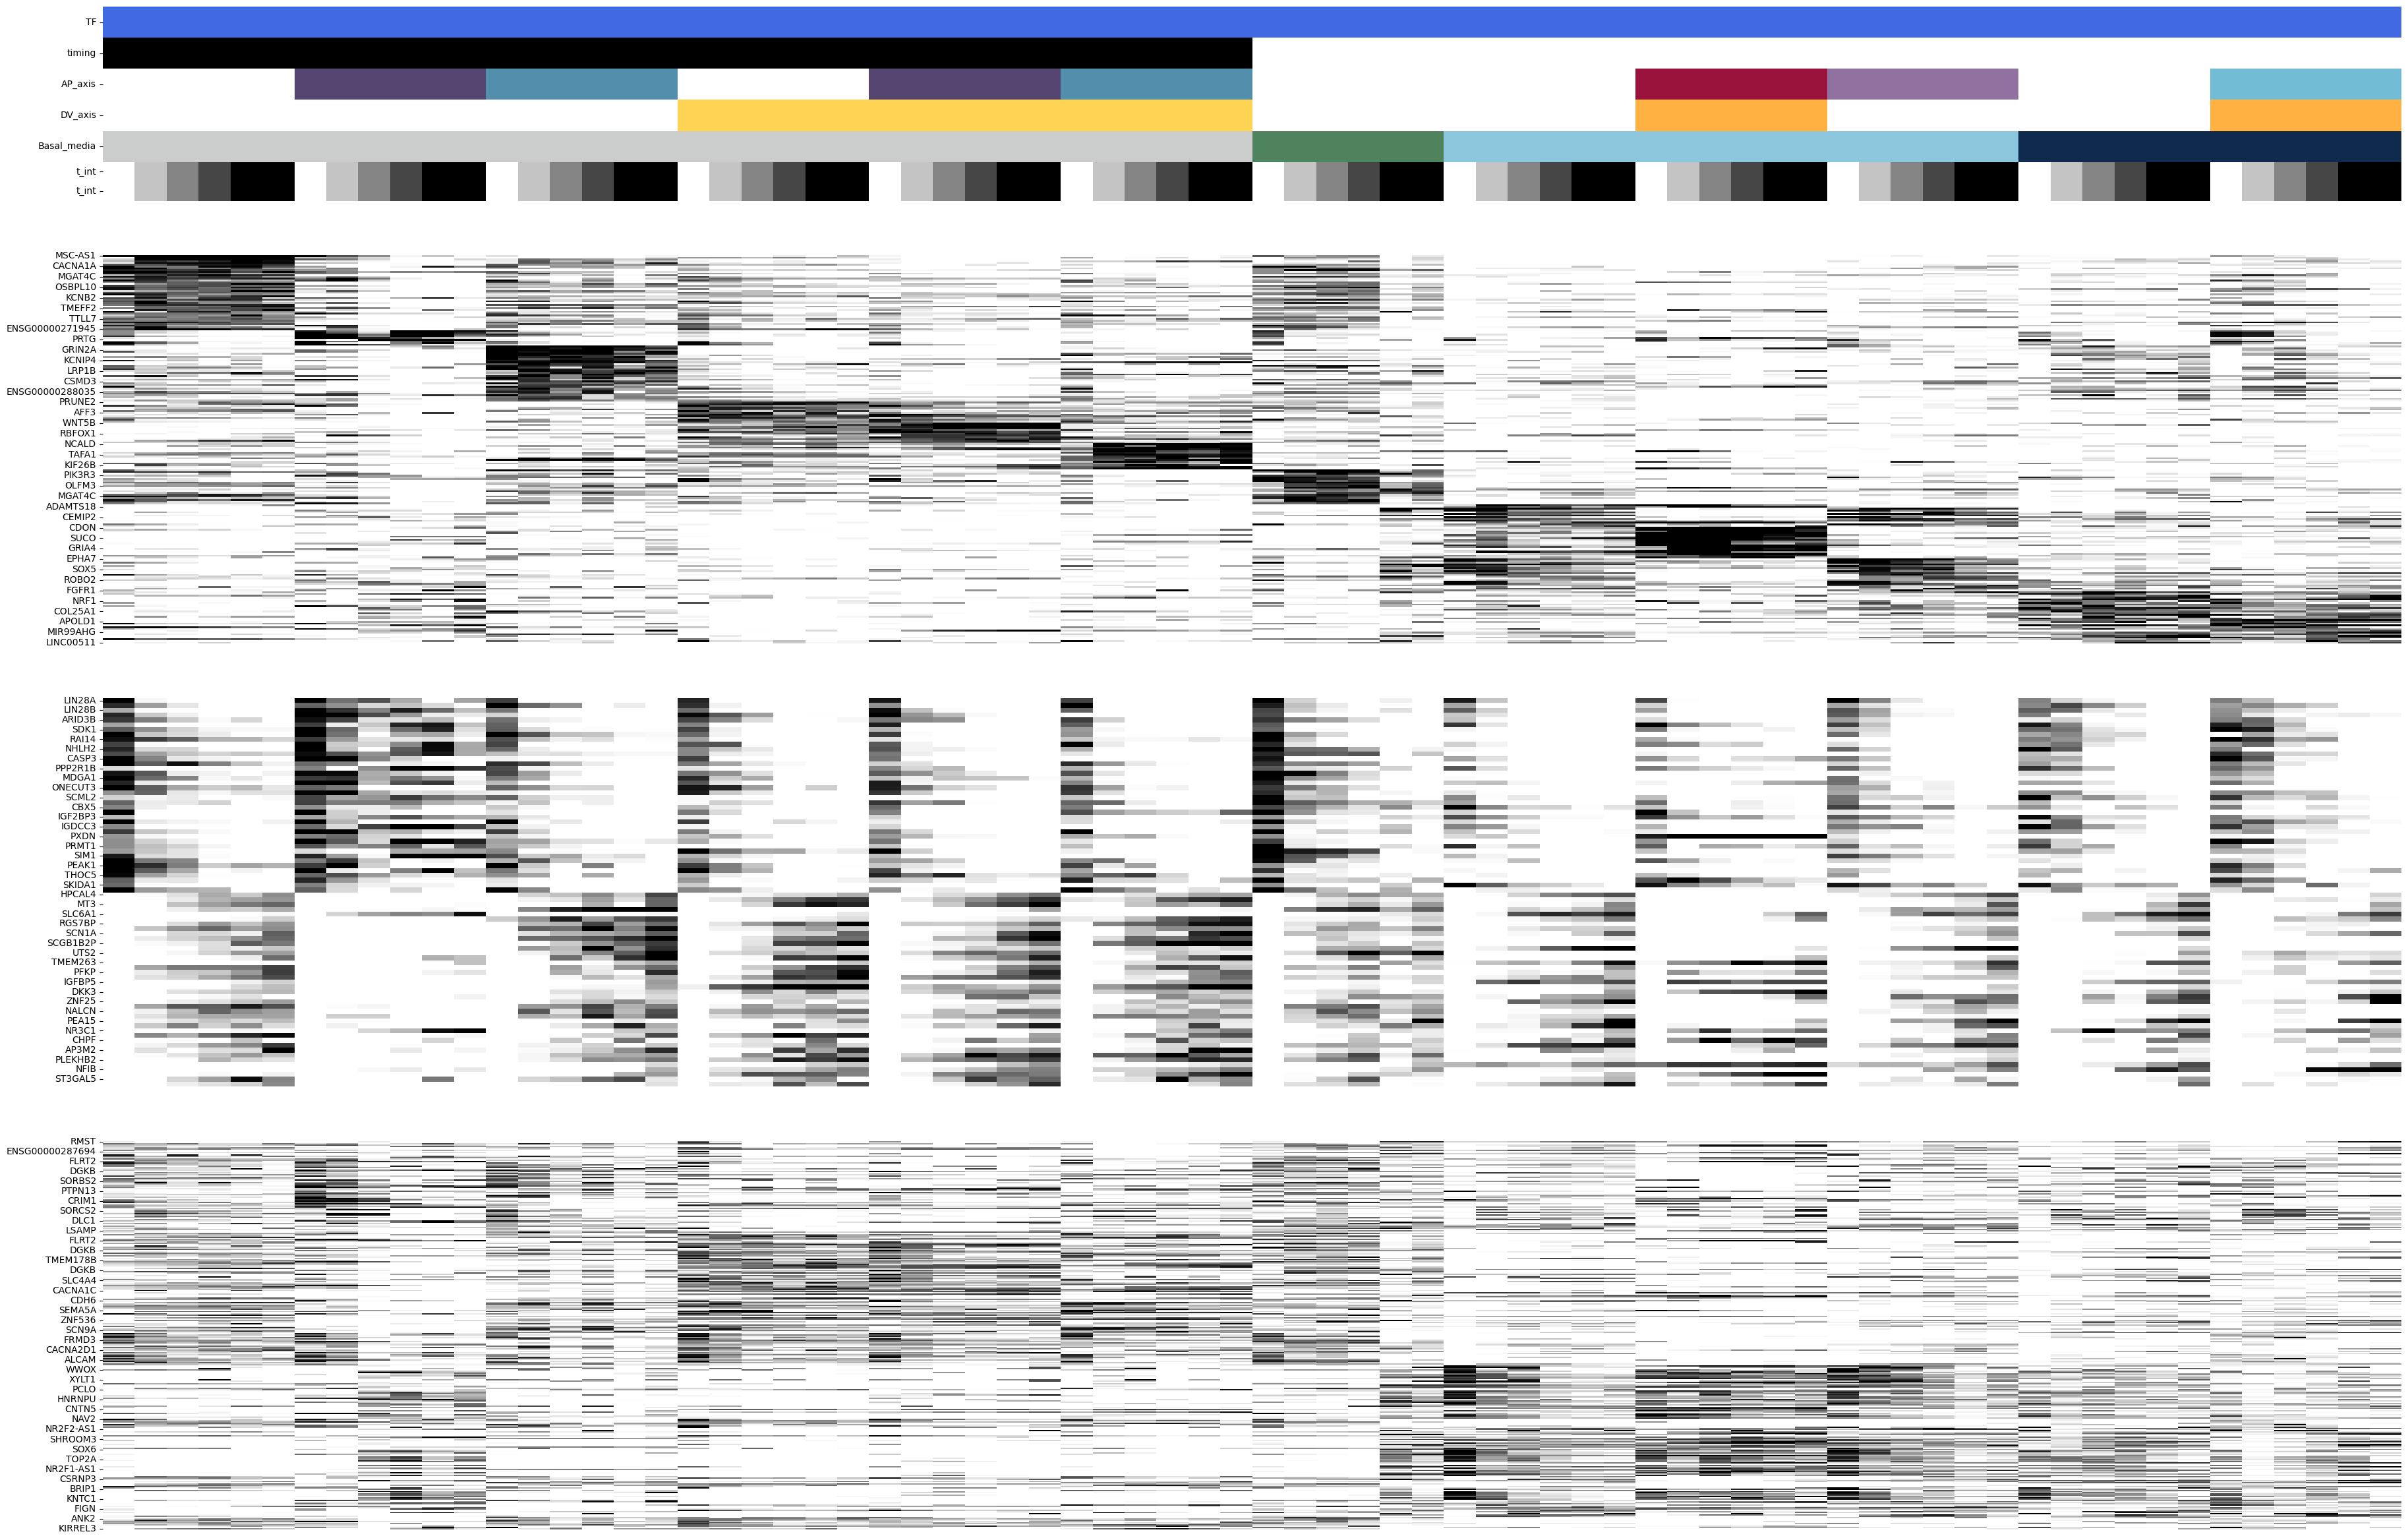

In [234]:
empty_space = 0.7
height_ratios = [2, #dendrogram 0,
                0.5, #time
                 empty_space,
                5, #heatmap1
                 empty_space,
                5, #heatmap 2
                 empty_space,
                5 #heatmap 3
                ]


white_axes = [2,4,6]
    
fig, axs = plt.subplots(len(height_ratios), 1, figsize=(45, 30), gridspec_kw={'height_ratios': height_ratios,
                                                           'hspace':0
                                                           })

# Dendrogram
ax_annotation = axs[0]
qualheatmap(bmeta.loc[sorted_samples_bulk,morphogens_summary].T,color_dict=color_dict,ax_heatmap=ax_annotation)
#ax_annotation.set_title('Annotation')
ax_annotation.set_xticks([])
#ax_annotation.set_yticks([])
ax_annotation.set_xticklabels([])
#ax_annotation.set_yticklabels([])

ax_timemap = axs[1]
sns.heatmap(bmeta.loc[bmeta.index,['t_int','t_int']].T,vmax=42,vmin=10,cmap='Greys',cbar=False,ax=ax_timemap)

# Heatmap 3
sc_markers_all_plot = [x for x in sc_markers_all if x not in time_genes]
sc_markers_all_plot = [x for x in sc_markers_all_plot if x not in stable_markers]

ax_heatmap1 = axs[3]
vsd_plot = vsd.loc[stable_markers,sorted_samples_bulk]
vsd_plot_Z = (vsd_plot.T-vsd_plot.T.mean())/vsd_plot.T.std()
sns.heatmap(vsd_plot_Z.T,vmin=0,vmax=2,cmap='Greys',cbar=False,ax=ax_heatmap1)
#ax_do.set_title('GO Disease')
ax_heatmap1.set_xticks([])
#ax_do.set_yticks([])
ax_heatmap1.set_xticklabels([])
#ax_do.set_yticklabels([])


# Heatmap 3
ax_heatmap2 = axs[5]
vsd_plot = vsd.loc[time_genes,sorted_samples_bulk]
vsd_plot_Z = (vsd_plot.T-vsd_plot.T.mean())/vsd_plot.T.std()
sns.heatmap(vsd_plot_Z.T,vmin=0,vmax=2,cmap='Greys',cbar=False,ax=ax_heatmap2)
#ax_do.set_title('GO Disease')
ax_heatmap2.set_xticks([])
#ax_do.set_yticks([])
ax_heatmap2.set_xticklabels([])
#ax_do.set_yticklabels([])

# Heatmap 3
ax_heatmap3 = axs[7]
vsd_plot = vsd.loc[sc_markers_all_plot,sorted_samples_bulk]
vsd_plot_Z = (vsd_plot.T-vsd_plot.T.mean())/vsd_plot.T.std()
sns.heatmap(vsd_plot_Z.T,vmin=0,vmax=2,cmap='Greys',cbar=False,ax=ax_heatmap3)
#ax_do.set_title('GO Disease')
ax_heatmap3.set_xticks([])
#ax_do.set_yticks([])
ax_heatmap3.set_xticklabels([])
#ax_do.set_yticklabels([])

for ax_white_nr in white_axes:
    ax_white = axs[ax_white_nr]
    ax_white.set_xticks([])
    ax_white.set_yticks([])
    ax_white.set_xticklabels([])
    ax_white.set_yticklabels([])
    sns.despine(left=True,bottom=True,ax=ax_white)

plt.savefig("stability_plots/qual_heatmap_markers_greys.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()

In [237]:
go_term_genes_man = {}
for term in ['neuron_projection','neuron_differentiation','neurotransmitter_secretion','synapse_assembly']:
    np_genes = pd.read_csv("~/jjans/analysis/iNeuron_morphogens/revisions/maturation/"+term+".txt",sep="\t",header=None)
    np_genes = list(np_genes[1])
    go_term_genes_man[term] = np_genes

In [248]:
for term in go_term_genes_man.keys():
    np_genes = go_term_genes_man[term]
    np_genes = list(set(np_genes)&set(vsd.index))
    vsd_plot = vsd.loc[np_genes,sorted_samples_bulk]
    bmeta[term] = vsd_plot.sum()

In [272]:
go_term_genes_man = {}
for term in ['neuron_projection','neuron_differentiation','neurotransmitter_secretion','synapse_assembly']:
    np_genes = pd.read_csv("~/jjans/analysis/iNeuron_morphogens/revisions/maturation/"+term+".txt",sep="\t",header=None)
    np_genes = list(np_genes[1])
    prin
    print(len(np_genes))

1339
1088
87
121


sample_name
Stability_d10_sample_12    688.233641
Stability_d21_sample_12    700.924426
Stability_d28_sample_12    712.980648
Stability_d35_sample_12    709.363000
Stability_d42_sample_12    720.533741
Stability_d49_sample_12    729.015256
Name: synapse_assembly, dtype: float64

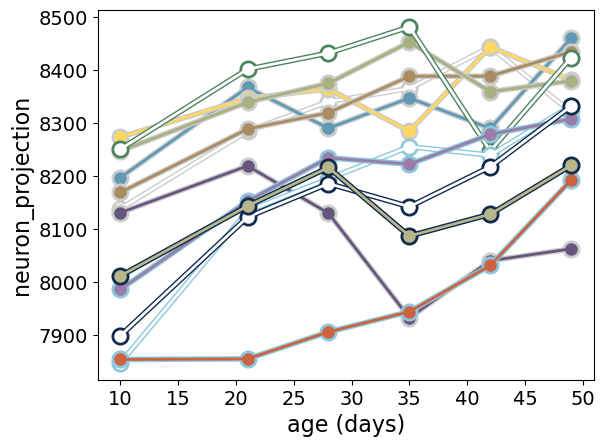

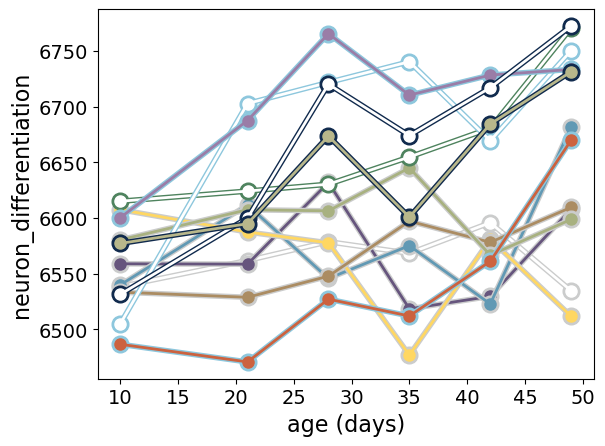

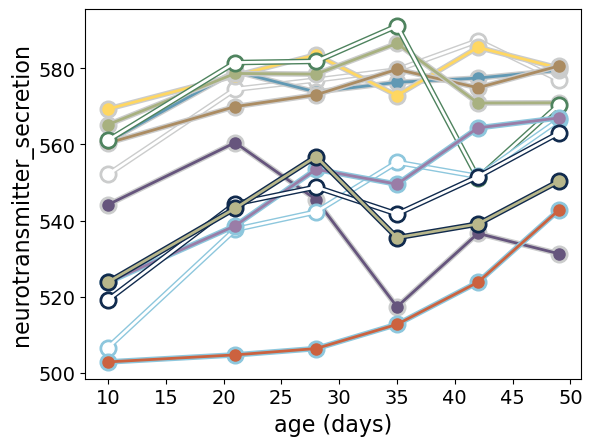

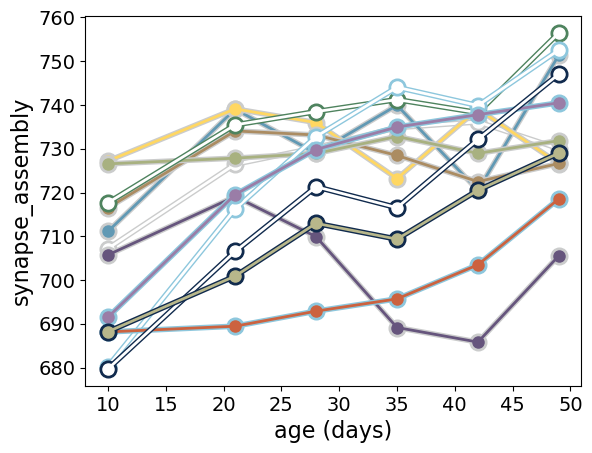

In [264]:
time = [10,21,28,35,42,49]
for term in go_term_genes_man.keys():

    for sample in sample2ID.keys():
        sample_name = "sample_"+str(sample)
        sample_timepoints = [x for x in df.index if x.endswith(sample_name)]
        sample_timepoints = list(bmeta.loc[sample_timepoints].sort_values(by='t_int').index)
        a = bmeta.loc[sample_timepoints,term]
        fill_color = sample_fillcolors[sample2ID[sample]]
        line_color = sample_BMcolors[sample2ID[sample]]
        plt.plot(time,a,'-o', color=line_color, linewidth=4,markersize=12)  # Outline with a thick black line
        plt.plot(time,a,'-o',label=sample2ID[sample],color=fill_color,linewidth=2,markersize=8)
    #plt.legend()
    plt.xlabel("age (days)",fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylabel(term,fontsize=16)
    plt.savefig("stability_plots/"+term+"_vsd_sum.png",dpi=350,bbox_inches='tight',pad_inches=0)
    plt.savefig("stability_plots/"+term+"_vsd_sum.pdf",dpi=350,bbox_inches='tight',pad_inches=0)
    plt.show()
    plt.close()

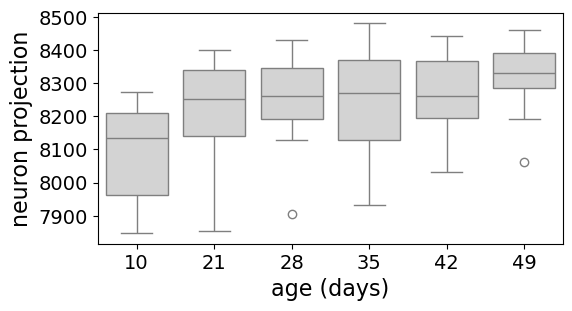

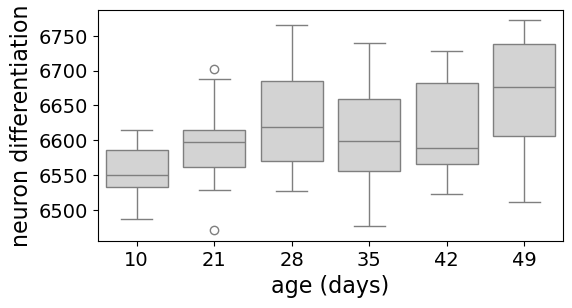

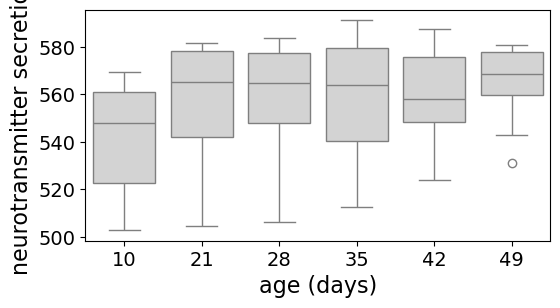

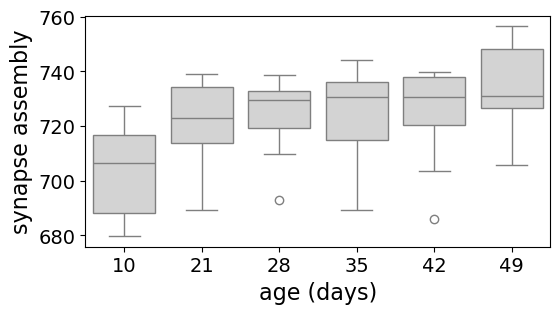

In [271]:
import re
for term in go_term_genes_man.keys():
    plt.figure(figsize=(6,3))
    sns.boxplot(x='t_int',y=term,data=bmeta,color='lightgrey')
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.ylabel(re.sub("_"," ",term),fontsize=16)
    plt.xlabel("age (days)",fontsize=16)
    plt.savefig("stability_plots/"+term+"_vsd_sum_boxplot.png",dpi=350,bbox_inches='tight',pad_inches=0)
    plt.savefig("stability_plots/"+term+"_vsd_sum_boxplot.pdf",dpi=350,bbox_inches='tight',pad_inches=0)

    plt.show()
    plt.close()

In [249]:
bmeta

t  sample  t_int genotype  repl  \
sample_name                                                  
Stability_d10_sample_1   d10       1     10    409B2     1   
Stability_d21_sample_1   d21       1     21    409B2     1   
Stability_d28_sample_1   d28       1     28    409B2     1   
Stability_d35_sample_1   d35       1     35    409B2     1   
Stability_d42_sample_1   d42       1     42    409B2     1   
...                      ...     ...    ...      ...   ...   
Stability_d21_sample_12  d21      12     21    409B2     1   
Stability_d28_sample_12  d28      12     28    409B2     1   
Stability_d35_sample_12  d35      12     35    409B2     1   
Stability_d42_sample_12  d42      12     42    409B2     1   
Stability_d49_sample_12  d49      12     49    409B2     1   

                                     sample_name parse_id  M_XAV  M_CHIR  \
sample_name                                                                
Stability_d10_sample_1    Stability_d10_sample_1    p1_D4    0.0     0.0   
Stability_d21_sample_1    Stability_d21_sample_1    p1_D4    0.0     0.0   
Stability_d28_sample_1    Stability_d28_sample_1    p1_D4    0.0     0.0   
Stability_d35_sample_1    Stability_d35_sample_1    p1_D4    0.0     0.0   
Stability_d42_sample_1    Stability_d42_sample_1    p1_D4    0.0     0.0   
...                                          ...      ...    ...     ...   
Stability_d21_sample_12  Stability_d21_sample_12   p3_G10    0.0     0.0   
Stability_d28_sample_12  Stability_d28_sample_12   p3_G10    0.0     0.0   
Stability_d35_sample_12  Stability_d35_sample_12   p3_G10    0.0     0.0   
Stability_d42_sample_12  Stability_d42_sample_12   p3_G10    0.0     0.0   
Stability_d49_sample_12  Stability_d49_sample_12   p3_G10    0.0     0.0   

                         M_RA  ...  M_SHH    TF  timing AP_axis DV_axis  \
sample_name                    ...                                        
Stability_d10_sample_1      0  ...      0  NGN2    post    ctrl    ctrl   
Stability_d21_sample_1      0  ...      0  NGN2    post    ctrl    ctrl   
Stability_d28_sample_1      0  ...      0  NGN2    post    ctrl    ctrl   
Stability_d35_sample_1      0  ...      0  NGN2    post    ctrl    ctrl   
Stability_d42_sample_1      0  ...      0  NGN2    post    ctrl    ctrl   
...                       ...  ...    ...   ...     ...     ...     ...   
Stability_d21_sample_12    10  ...      0  NGN2     pre    RA_2  BMP4_3   
Stability_d28_sample_12    10  ...      0  NGN2     pre    RA_2  BMP4_3   
Stability_d35_sample_12    10  ...      0  NGN2     pre    RA_2  BMP4_3   
Stability_d42_sample_12    10  ...      0  NGN2     pre    RA_2  BMP4_3   
Stability_d49_sample_12    10  ...      0  NGN2     pre    RA_2  BMP4_3   

                           Basal_media synapse_assembly neuron_projection  \
sample_name                                                                 
Stability_d10_sample_1           mTeSR       707.224580       8138.267502   
Stability_d21_sample_1           mTeSR       726.476550       8284.769094   
Stability_d28_sample_1           mTeSR       730.262218       8340.438802   
Stability_d35_sample_1           mTeSR       734.844553       8365.273938   
Stability_d42_sample_1           mTeSR       736.142434       8443.809113   
...                                ...              ...               ...   
Stability_d21_sample_12  N2B27_SB_CHIR       700.924426       8143.414998   
Stability_d28_sample_12  N2B27_SB_CHIR       712.980648       8216.149103   
Stability_d35_sample_12  N2B27_SB_CHIR       709.363000       8086.639558   
Stability_d42_sample_12  N2B27_SB_CHIR       720.533741       8127.904281   
Stability_d49_sample_12  N2B27_SB_CHIR       729.015256       8220.141965   

                         neuron_differentiation  neurotransmitter_secretion  
sample_name                                                                  
Stability_d10_sample_1              6538.338792                  552.125228  
Stability_d21_sampl

In [ ]:
go_term_genes_man

/tmp/ipykernel_53280/851740362.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mapped_data = df.applymap(lambda x: value_mapping.get(color_dict_annot.get(x, 'white')))


adding on existing axis


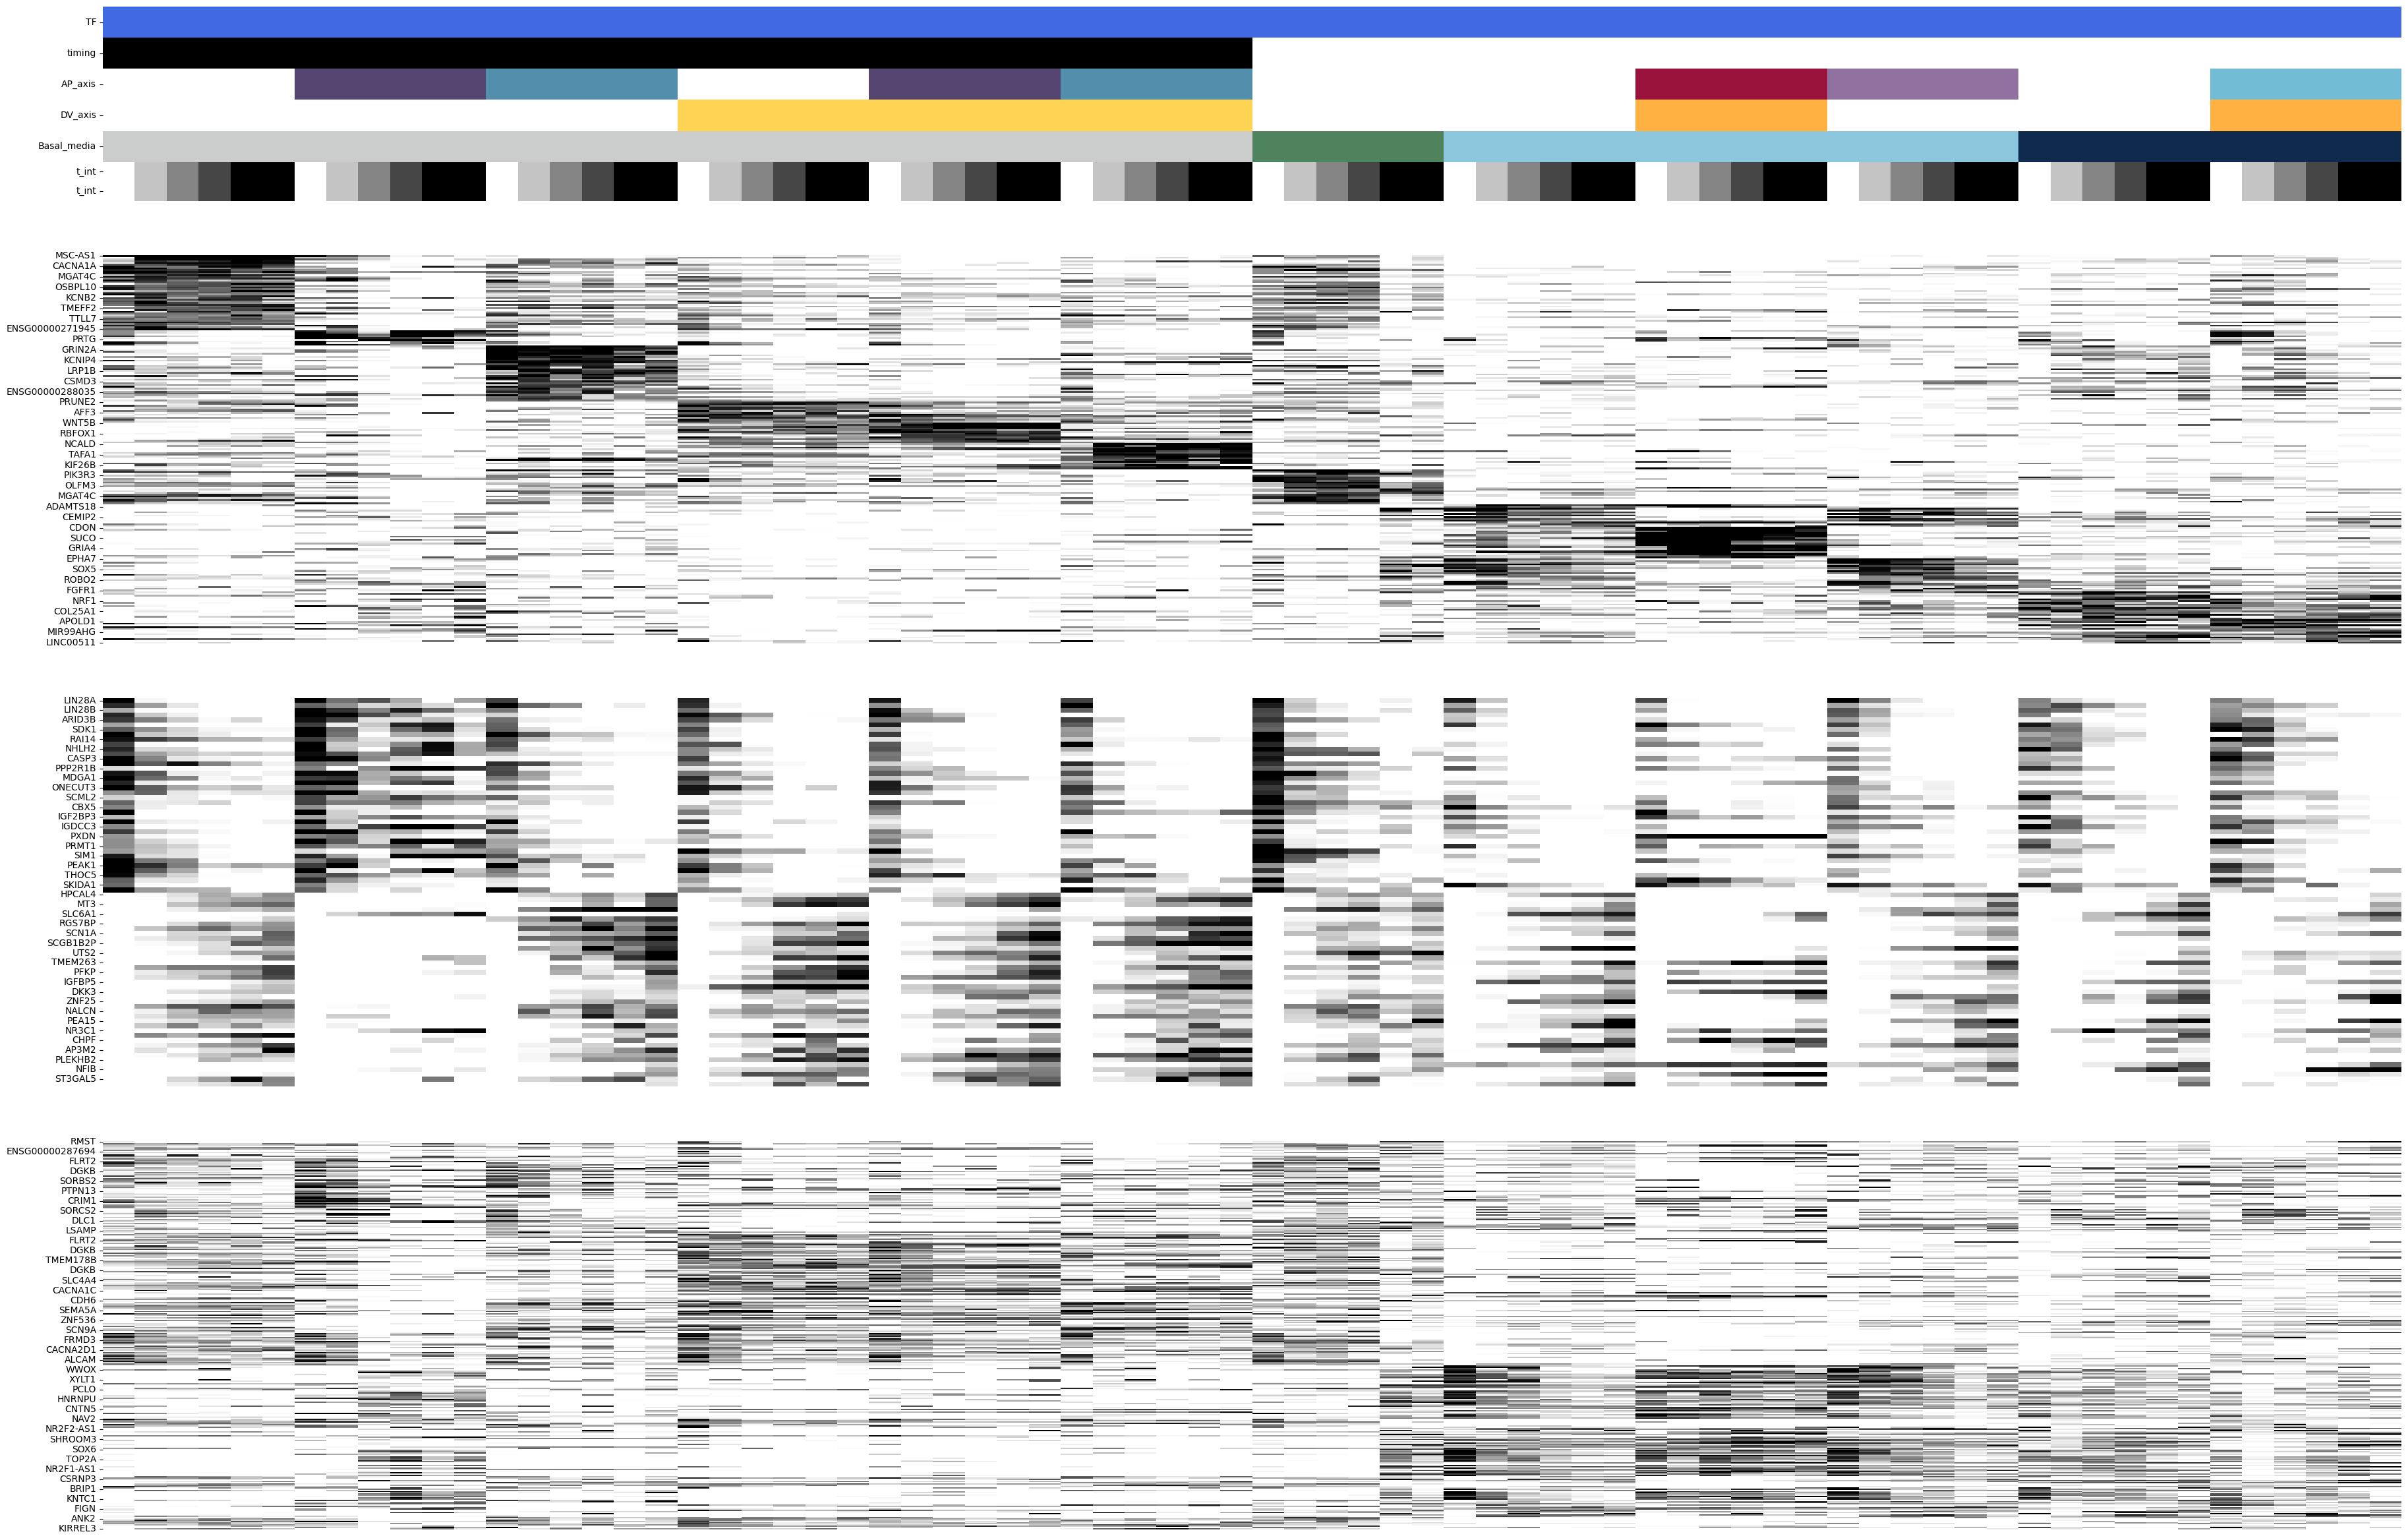

In [235]:
empty_space = 0.7
height_ratios = [2, #dendrogram 0,
                0.5, #time
                 empty_space,
                5, #heatmap1
                 empty_space,
                5, #heatmap 2
                 empty_space,
                5 #heatmap 3
                ]


white_axes = [2,4,6]
    
fig, axs = plt.subplots(len(height_ratios), 1, figsize=(45, 30), gridspec_kw={'height_ratios': height_ratios,
                                                           'hspace':0
                                                           })

# Dendrogram
ax_annotation = axs[0]
qualheatmap(bmeta.loc[sorted_samples_bulk,morphogens_summary].T,color_dict=color_dict,ax_heatmap=ax_annotation)
#ax_annotation.set_title('Annotation')
ax_annotation.set_xticks([])
#ax_annotation.set_yticks([])
ax_annotation.set_xticklabels([])
#ax_annotation.set_yticklabels([])

ax_timemap = axs[1]
sns.heatmap(bmeta.loc[bmeta.index,['t_int','t_int']].T,vmax=42,vmin=10,cmap='Greys',cbar=False,ax=ax_timemap)

# Heatmap 3
sc_markers_all_plot = [x for x in sc_markers_all if x not in time_genes]
sc_markers_all_plot = [x for x in sc_markers_all_plot if x not in stable_markers]

ax_heatmap1 = axs[3]
vsd_plot = vsd.loc[stable_markers,sorted_samples_bulk]
vsd_plot_Z = (vsd_plot.T-vsd_plot.T.mean())/vsd_plot.T.std()
sns.heatmap(vsd_plot_Z.T,vmin=0,vmax=2,cmap='Greys',cbar=False,ax=ax_heatmap1)
#ax_do.set_title('GO Disease')
ax_heatmap1.set_xticks([])
#ax_do.set_yticks([])
ax_heatmap1.set_xticklabels([])
#ax_do.set_yticklabels([])


# Heatmap 3
ax_heatmap2 = axs[5]
vsd_plot = vsd.loc[time_genes,sorted_samples_bulk]
vsd_plot_Z = (vsd_plot.T-vsd_plot.T.mean())/vsd_plot.T.std()
sns.heatmap(vsd_plot_Z.T,vmin=0,vmax=2,cmap='Greys',cbar=False,ax=ax_heatmap2)
#ax_do.set_title('GO Disease')
ax_heatmap2.set_xticks([])
#ax_do.set_yticks([])
ax_heatmap2.set_xticklabels([])
#ax_do.set_yticklabels([])

# Heatmap 3
ax_heatmap3 = axs[7]
vsd_plot = vsd.loc[sc_markers_all_plot,sorted_samples_bulk]
vsd_plot_Z = (vsd_plot.T-vsd_plot.T.mean())/vsd_plot.T.std()
sns.heatmap(vsd_plot_Z.T,vmin=0,vmax=2,cmap='Greys',cbar=False,ax=ax_heatmap3)
#ax_do.set_title('GO Disease')
ax_heatmap3.set_xticks([])
#ax_do.set_yticks([])
ax_heatmap3.set_xticklabels([])
#ax_do.set_yticklabels([])

for ax_white_nr in white_axes:
    ax_white = axs[ax_white_nr]
    ax_white.set_xticks([])
    ax_white.set_yticks([])
    ax_white.set_xticklabels([])
    ax_white.set_yticklabels([])
    sns.despine(left=True,bottom=True,ax=ax_white)

#plt.savefig("stability_plots/qual_heatmap_markers_greys.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()

In [ ]:
empty_space = 0.7
height_ratios = [5, #dendrogram 0,
                 5/3, #condition plot 1
                 5, #condition plot 2
                empty_space, #empty 3
                 1.4, #purity plot 4
                 empty_space, #empty 5 
                 6.5, #disease 6
                 empty_space, #empty 7
                 13] #gene expression 8


white_axes = [3,5,7]
    
fig, axs = plt.subplots(len(height_ratios), 1, figsize=(45, 30), gridspec_kw={'height_ratios': height_ratios,
                                                           'hspace':0
                                                           })

# Dendrogram
linked = linkage(cluster_avg_all_norm_use.T, method='complete', metric = 'cosine')
dendrogram(linked,ax=axs[0], labels=cluster_avg_all_norm_use.columns, leaf_rotation=90,color_threshold=0,above_threshold_color='k')
#axs[0].set_title('Dendrogram')
axs[0].set_xticks([])
axs[0].set_yticks([])
axs[0].set_xticklabels([])
axs[0].set_yticklabels([])



ax_annotation = axs[1]
qualheatmap(annotation_df.loc[xlbls_names,['Division','Region','Neuron_type']].T,color_dict=color_dict_annots,ax_heatmap=ax_annotation)
#ax_annotation.set_title('Annotation')
ax_annotation.set_xticks([])
#ax_annotation.set_yticks([])
ax_annotation.set_xticklabels([])
#ax_annotation.set_yticklabels([])

ax_annotation = axs[2]
qualheatmap(df = cond_summary_plot.loc[xlbls_names,morph_axis].T,color_dict=color_dict,ax_heatmap=ax_annotation)
#ax_annotation.set_title('Annotation')
ax_annotation.set_xticks([])
#ax_annotation.set_yticks([])
ax_annotation.set_xticklabels([])
#ax_annotation.set_yticklabels([])


ax_purity = axs[4]
ax_purity.bar(x=sizes.index,height=sizes['size'],width=1,color='k')
ax_purity.set_xticks([])
ax_purity.set_yticks([0,1])
ax_purity.set_xticklabels([])
ax_purity.set_yticklabels([0,1])
ax_purity.set_xlim([sizes.index[0]-0.5,sizes.index[-1]+0.5])
sns.despine(left=False,bottom=True,ax=ax_purity)


# Heatmap 3
ax_do = axs[6]
sns.heatmap(go_summary.loc[xlbls_names,subset_terms].T,vmax=5,vmin=0,cmap='Reds',cbar=False,ax=ax_do)
#ax_do.set_title('GO Disease')
ax_do.set_xticks([])
#ax_do.set_yticks([])
ax_do.set_xticklabels([])
#ax_do.set_yticklabels([])


ax_gene = axs[8]
plotting_genes_plot = [x for x in plotting_genes if x!='MAP2']
sns.heatmap(cluster_avg_all_norm_Z.loc[plotting_genes_plot,xlbls_names],vmin=-2,vmax=2,cmap='RdBu_r',cbar=False,ax=ax_gene)
#ax_gene.set_title('GO Disease')
ax_gene.set_xticks([])
#ax_gene.set_yticks([])
ax_gene.set_xticklabels([])
#ax_gene.set_yticklabels([])

for ax_white_nr in white_axes:
    ax_white = axs[ax_white_nr]
    ax_white.set_xticks([])
    ax_white.set_yticks([])
    ax_white.set_xticklabels([])
    ax_white.set_yticklabels([])
    sns.despine(left=True,bottom=True,ax=ax_white)

plt.savefig("figures/dendrogram/combined_plot_onlyNeur_ratios_annot.png",dpi=350,bbox_inches='tight',pad_inches=0)
#plt.savefig("figures/dendrogram/combined_plot_onlyNeur_ratios_hr_annot.png",dpi=1000,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()

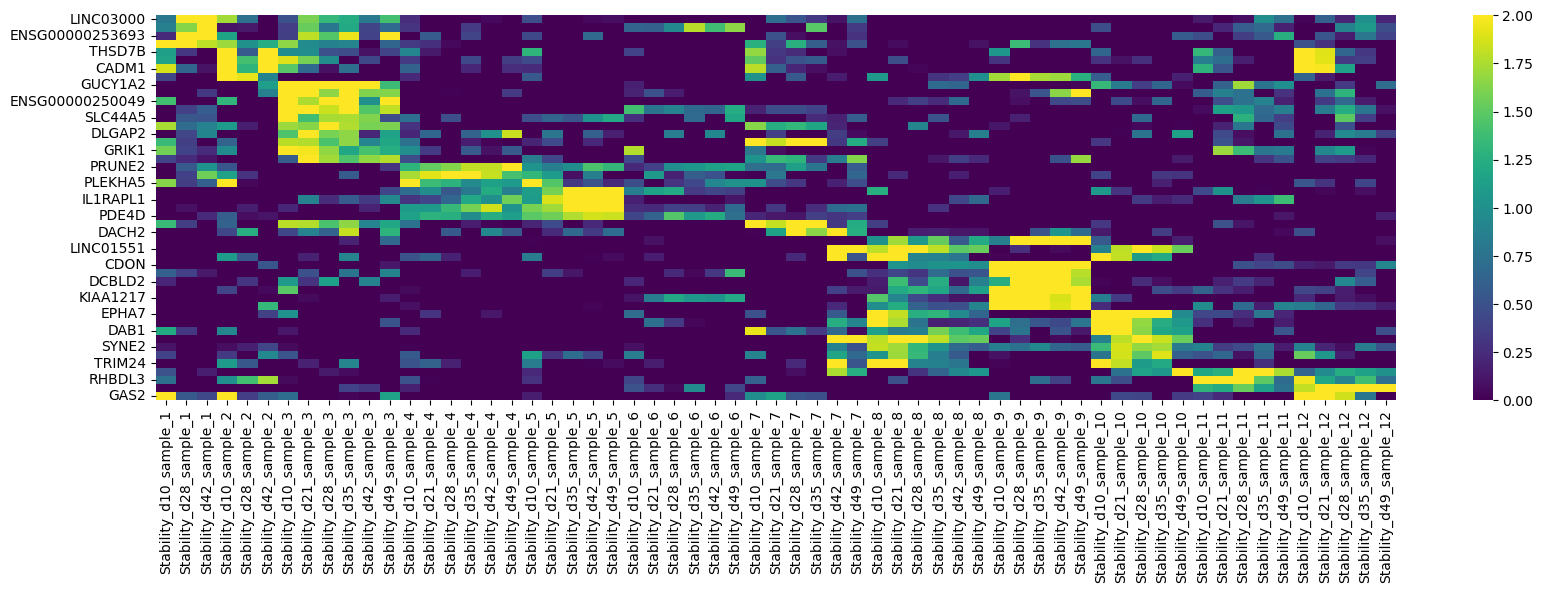

In [70]:
vsd_plot = vsd.loc[sample_markers_all_bulk_sc,sorted_samples]
vsd_plot_Z = (vsd_plot.T-vsd_plot.T.mean())/vsd_plot.T.std()
plt.figure(figsize=(20,5))
sns.heatmap(vsd_plot_Z.T,vmin=0,vmax=2,cmap='viridis')
#plt.savefig("stability_plots/sample_heatmap_markers_sorted.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()



In [26]:
df

Stability_d21_sample_9  Stability_d21_sample_4  \
Stability_d21_sample_9                 0.000000              124.905865   
Stability_d21_sample_4               124.905865                0.000000   
Stability_d21_sample_5               119.896031               54.346609   
Stability_d21_sample_10               87.095751               95.987087   
Stability_d21_sample_7               126.402321               67.158145   
...                                         ...                     ...   
Stability_d28_sample_12               94.689391               85.966762   
Stability_d28_sample_8                86.533173               93.814051   
Stability_d28_sample_7               129.441507               66.105836   
Stability_d28_sample_6               120.768796               66.445449   
Stability_d28_sample_5               123.280530               58.722100   

                         Stability_d21_sample_5  Stability_d21_sample_10  \
Stability_d21_sample_9               119.896031                87.095751   
Stability_d21_sample_4                54.346609                95.987087   
Stability_d21_sample_5                 0.000000                94.741266   
Stability_d21_sample_10               94.741266                 0.000000   
Stability_d21_sample_7                69.979422                92.183140   
...                                         ...                      ...   
Stability_d28_sample_12               86.435682                69.247759   
Stability_d28_sample_8                93.874160                52.950684   
Stability_d28_sample_7                71.230522                95.829518   
Stability_d28_sample_6                73.017627               102.634011   
Stability_d28_sample_5                46.129373                99.519031   

                         Stability_d21_sample_7  Stability_d21_sample_6  \
Stability_d21_sample_9               126.402321              116.274745   
Stability_d21_sample_4                67.158145               65.666217   
Stability_d21_sample_5                69.979422               69.136228   
Stability_d21_sample_10               92.183140               98.282883   
Stability_d21_sample_7                 0.000000               81.748135   
...                                         ...                     ...   
Stability_d28_sample_12               84.193632               82.383710   
Stability_d28_sample_8                92.409329               97.698648   
Stability_d28_sample_7                49.617167               84.003971   
Stability_d28_sample_6                85.499832               46.381976   
Stability_d28_sample_5                76.224352               72.652883   

                         Stability_d21_sample_1  Stability_d21_sample_12  \
Stability_d21_sample_9               125.622358                93.464888   
Stability_d21_sample_4                67.657586                85.849969   
Stability_d21_sample_5                75.668971                86.564655   
Stability_d21_sample_10               91.227105                68.262929   
Stability_d21_sample_7                60.668117                85.417813   
...                                         ...                      ...   
Stability_d28_sample_12               80.527132                47.743644   
Stability_d28_sample_8                89.551568                69.551736   
Stability_d28_sample_7                61.653106                88.138482   
Stability_d28_sample_6                83.959594                87.927931   
Stability_d28_sample_5                80.503239                90.903826   

                         Stability_d21_sample_3  Stability_d21_sample_2  ...  \
Stability_d21_sample_9               124.418175              117.418188  ...   
Stability_d21_sample_4                67.156318               74.010430  ...   
Stability_d21_sample_5                72.229308               70.783436  ...   
Stability_d21_sample_10               92.996966               86.902335  ... 

In [20]:
# Sample data
data = np.random.rand(10, 4)  # 10 samples, 4 features

# Perform hierarchical clustering
linkage_matrix = sch.linkage(data, method='ward')


# Create the dendrogram with custom leaf label colors
dendrogram = sch.dendrogram(
    linkage_matrix,
    leaf_rotation=90,  # Rotate leaf labels for better readability
    leaf_font_size=12  # Font size for leaf labels
)

# Manually color the leaves
ax = plt.gca()
x_labels = ax.get_xmajorticklabels()
for label in x_labels:
    txt = label.get_text()
    color_code = leaf_colors[txt]
    label.set_color(color_code)

plt.show()


KeyError: 1

In [76]:
def leaf_label_func(id):
    return f'[{leaf_colors[id]}]{id}'


In [13]:
# Define a custom leaf label function
def leaf_label_func(id):
    leaf_colors = {'Stability_d21_sample_1': 'red',
                 'Stability_d49_sample_1': 'red',
                 'Stability_d35_sample_1': 'red',
                 'Stability_d42_sample_1': 'red',
                 'Stability_d10_sample_1': 'red',
                 'Stability_d28_sample_1': 'red',
                 'Stability_d21_sample_2': 'green',
                 'Stability_d49_sample_2': 'green',
                 'Stability_d35_sample_2': 'green',
                 'Stability_d42_sample_2': 'green',
                 'Stability_d10_sample_2': 'green',
                 'Stability_d28_sample_2': 'green',
                 'Stability_d21_sample_3': 'blue',
                 'Stability_d49_sample_3': 'blue',
                 'Stability_d35_sample_3': 'blue',
                 'Stability_d42_sample_3': 'blue',
                 'Stability_d10_sample_3': 'blue',
                 'Stability_d28_sample_3': 'blue',
                 'Stability_d21_sample_4': 'cyan',
                 'Stability_d49_sample_4': 'cyan',
                 'Stability_d35_sample_4': 'cyan',
                 'Stability_d42_sample_4': 'cyan',
                 'Stability_d10_sample_4': 'cyan',
                 'Stability_d28_sample_4': 'cyan',
                 'Stability_d21_sample_5': 'magenta',
                 'Stability_d49_sample_5': 'magenta',
                 'Stability_d35_sample_5': 'magenta',
                 'Stability_d42_sample_5': 'magenta',
                 'Stability_d10_sample_5': 'magenta',
                 'Stability_d28_sample_5': 'magenta',
                 'Stability_d21_sample_6': 'yellow',
                 'Stability_d49_sample_6': 'yellow',
                 'Stability_d35_sample_6': 'yellow',
                 'Stability_d42_sample_6': 'yellow',
                 'Stability_d10_sample_6': 'yellow',
                 'Stability_d28_sample_6': 'yellow',
                 'Stability_d21_sample_7': 'black',
                 'Stability_d49_sample_7': 'black',
                 'Stability_d35_sample_7': 'black',
                 'Stability_d42_sample_7': 'black',
                 'Stability_d10_sample_7': 'black',
                 'Stability_d28_sample_7': 'black',
                 'Stability_d21_sample_8': 'white',
                 'Stability_d49_sample_8': 'white',
                 'Stability_d35_sample_8': 'white',
                 'Stability_d42_sample_8': 'white',
                 'Stability_d10_sample_8': 'white',
                 'Stability_d28_sample_8': 'white',
                 'Stability_d21_sample_9': 'orange',
                 'Stability_d49_sample_9': 'orange',
                 'Stability_d35_sample_9': 'orange',
                 'Stability_d42_sample_9': 'orange',
                 'Stability_d10_sample_9': 'orange',
                 'Stability_d28_sample_9': 'orange',
                 'Stability_d21_sample_10': 'purple',
                 'Stability_d49_sample_10': 'purple',
                 'Stability_d35_sample_10': 'purple',
                 'Stability_d42_sample_10': 'purple',
                 'Stability_d10_sample_10': 'purple',
                 'Stability_d28_sample_10': 'purple',
                 'Stability_d21_sample_11': 'brown',
                 'Stability_d49_sample_11': 'brown',
                 'Stability_d35_sample_11': 'brown',
                 'Stability_d42_sample_11': 'brown',
                 'Stability_d10_sample_11': 'brown',
                 'Stability_d28_sample_11': 'brown',
                 'Stability_d21_sample_12': 'pink',
                 'Stability_d49_sample_12': 'pink',
                 'Stability_d35_sample_12': 'pink',
                 'Stability_d42_sample_12': 'pink',
                 'Stability_d10_sample_12': 'pink',
                 'Stability_d28_sample_12': 'pink'}


    return f'[{leaf_colors[id]}]{id}'


# Create the dendrogram with custom leaf label colors
dendrogram = sch.dendrogram(
    linkage_matrix,
    leaf_label_func=leaf_label_func,
    leaf_rotation=90,  # Rotate leaf labels for better readability
    leaf_font_size=12  # Font size for leaf labels
)


dendrogram_labels = df.index[dendrogram['leaves']]



KeyError: 47

In [86]:
# Create the dendrogram with custom leaf label colors
dendrogram = sch.dendrogram(
    df,
    labels=df.index,
)



ValueError: Dimensions of Z and labels must be consistent.

In [57]:
vsd_plot = vsd.loc[sample_markers_all,dendrogram_labels]
vsd_plot_Z = (vsd_plot.T-vsd_plot.T.mean())/vsd_plot.T.std()

plt.figure(figsize=(20,5))
sns.heatmap(vsd_plot_Z.T,vmin=0,vmax=2)

<Axes: >

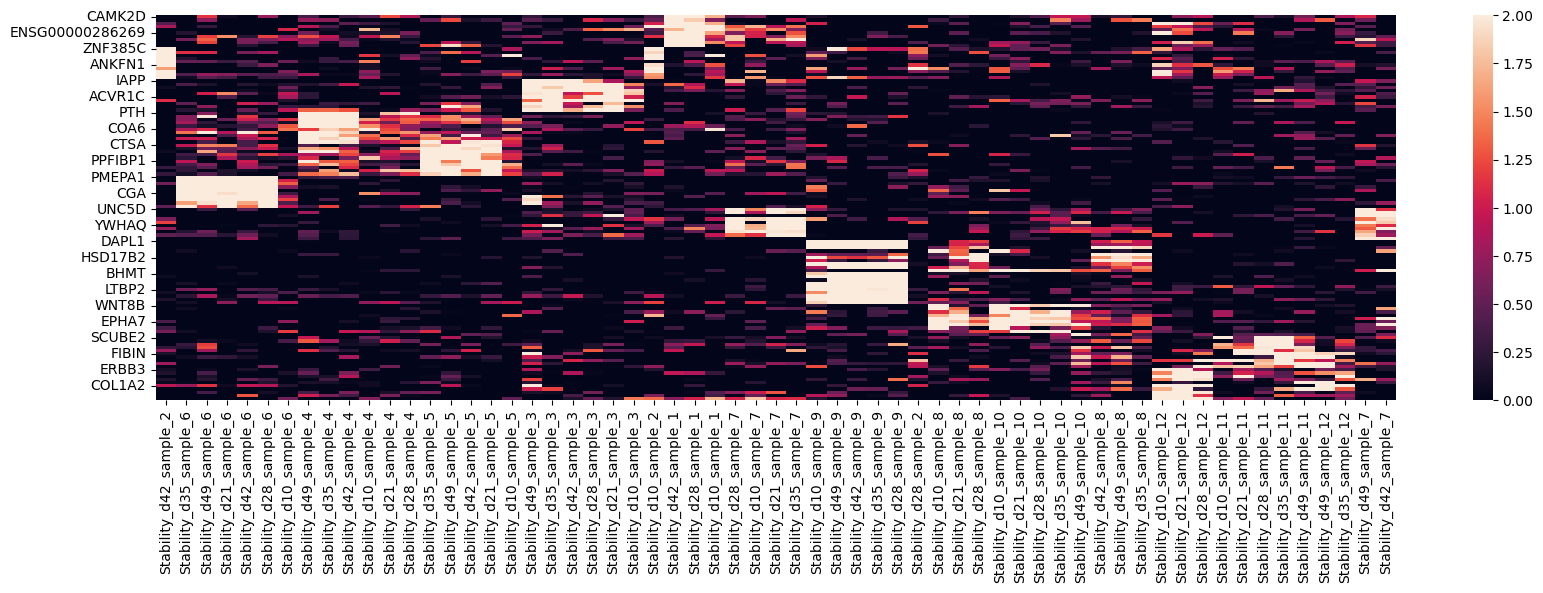

In [88]:
# Perform hierarchical clustering using the distance matrix
linked = sch.linkage(distance_matrix, method='complete')


/tmp/ipykernel_23962/3190910593.py:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = sch.linkage(distance_matrix, method='complete')


Stability_d21_sample_4  Stability_d21_sample_5  \
Stability_d21_sample_4                 0.000000               67.782094   
Stability_d21_sample_5                67.782094                0.000000   
Stability_d21_sample_10              115.101891              113.158812   
Stability_d21_sample_7                82.523176               85.359722   
Stability_d21_sample_6                80.502424               84.064952   
...                                         ...                     ...   
Stability_d28_sample_3                84.765478               89.006898   
Stability_d28_sample_12              103.708090              103.894902   
Stability_d28_sample_8               112.615685              112.329630   
Stability_d28_sample_7                80.412650               86.002927   
Stability_d28_sample_6                80.515964               87.810426   

                         Stability_d21_sample_10  Stability_d21_sample_7  \
Stability_d21_sample_4                115.101891               82.523176   
Stability_d21_sample_5                113.158812               85.359722   
Stability_d21_sample_10                 0.000000              110.364017   
Stability_d21_sample_7                110.364017                0.000000   
Stability_d21_sample_6                117.169863               98.640491   
...                                          ...                     ...   
Stability_d28_sample_3                106.207441               77.287892   
Stability_d28_sample_12                83.058510              101.695766   
Stability_d28_sample_8                 64.761733              110.826150   
Stability_d28_sample_7                113.141966               61.539714   
Stability_d28_sample_6                120.949712              102.271311   

                         Stability_d21_sample_6  Stability_d21_sample_12  \
Stability_d21_sample_4                80.502424               103.971158   
Stability_d21_sample_5                84.064952               104.280456   
Stability_d21_sample_10              117.169863                83.047050   
Stability_d21_sample_7                98.640491               103.280597   
Stability_d21_sample_6                 0.000000               102.323896   
...                                         ...                      ...   
Stability_d28_sample_3                91.303309                88.562861   
Stability_d28_sample_12               99.321278                59.311254   
Stability_d28_sample_8               116.784170                84.343329   
Stability_d28_sample_7               100.772621               105.350942   
Stability_d28_sample_6                56.767881               104.537266   

                         Stability_d21_sample_3  Stability_d21_sample_11  \
Stability_d21_sample_4                82.522993               112.171177   
Stability_d21_sample_5                87.863328               109.050005   
Stability_d21_sample_10              111.667214                74.853558   
Stability_d21_sample_7                79.534203               109.246944   
Stability_d21_sample_6                88.375818               110.292680   
...                                         ...                      ...   
Stability_d28_sample_3                62.843063                95.791416   
Stability_d28_sample_12               94.972293                67.586451   
Stability_d28_sample_8               106.810143                77.590665   
Stability_d28_sample_7                79.716192               111.257868   
Stability_d28_sample_6                91.259079               114.307376   

                         Stability_d21_sample_8  Stability_d49_sample_4  ...  \
Stability_d21_sample_4               123.012091               72.505498  ...   
Stability_d21_sample_5               119.591049               73.730530  ...   
Stability_d21_sample_10               60.713964              120.229177  ...   
Stability_d21_sample_7               119.852087               91.

/tmp/ipykernel_23962/3114295786.py:17: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linked = sch.linkage(distance_matrix, method='complete')


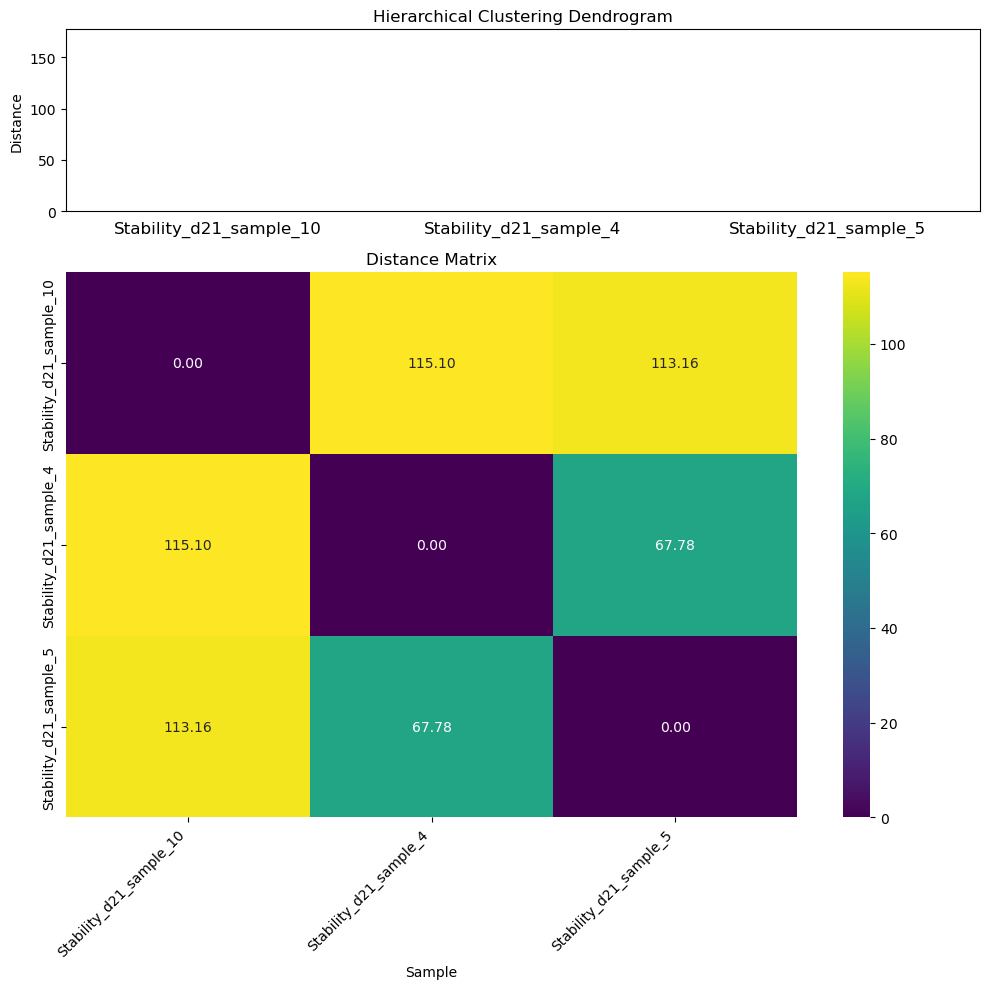

In [30]:
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import seaborn as sns

# Distance matrix as a numpy array
distance_matrix = np.array([
    [0.000000, 67.782094, 115.101891],
    [67.782094, 0.000000, 113.158812],
    [115.101891, 113.158812, 0.000000]
])

# Sample labels
labels = ["Stability_d21_sample_4", "Stability_d21_sample_5", "Stability_d21_sample_10"]

# Perform hierarchical clustering using the distance matrix
linked = sch.linkage(distance_matrix, method='complete')

# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [1, 3]}, sharex=True)

# Plot the dendrogram on the first subplot
dendrogram = sch.dendrogram(linked, labels=labels, ax=ax1)
ax1.set_title('Hierarchical Clustering Dendrogram')
ax1.set_ylabel('Distance')

# Reorder the distance matrix according to the dendrogram leaves
dendro_order = dendrogram['leaves']
ordered_distance_matrix = distance_matrix[dendro_order, :][:, dendro_order]
ordered_labels = [labels[i] for i in dendro_order]

# Plot the distance matrix as a heatmap on the second subplot
sns.heatmap(ordered_distance_matrix, annot=True, fmt=".2f", cmap='viridis', xticklabels=ordered_labels, yticklabels=ordered_labels, ax=ax2)
ax2.set_title('Distance Matrix')
ax2.set_xlabel('Sample')

# Rotate x-axis labels for better readability
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

# Adjust layout to make room for labels
plt.tight_layout()

# Show the plot
plt.show()


/tmp/ipykernel_23962/297810392.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(df, 'single')


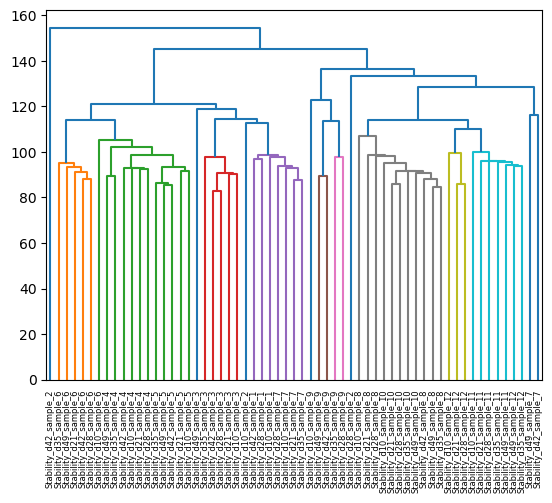

In [16]:
Z = hierarchy.linkage(df, 'single')

plt.figure()
dn = hierarchy.dendrogram(Z,labels=df.index)

In [3]:
df

Stability_d21_sample_4  Stability_d21_sample_5  \
Stability_d21_sample_4                 0.000000               67.782094   
Stability_d21_sample_5                67.782094                0.000000   
Stability_d21_sample_10              115.101891              113.158812   
Stability_d21_sample_7                82.523176               85.359722   
Stability_d21_sample_6                80.502424               84.064952   
...                                         ...                     ...   
Stability_d28_sample_3                84.765478               89.006898   
Stability_d28_sample_12              103.708090              103.894902   
Stability_d28_sample_8               112.615685              112.329630   
Stability_d28_sample_7                80.412650               86.002927   
Stability_d28_sample_6                80.515964               87.810426   

                         Stability_d21_sample_10  Stability_d21_sample_7  \
Stability_d21_sample_4                115.101891               82.523176   
Stability_d21_sample_5                113.158812               85.359722   
Stability_d21_sample_10                 0.000000              110.364017   
Stability_d21_sample_7                110.364017                0.000000   
Stability_d21_sample_6                117.169863               98.640491   
...                                          ...                     ...   
Stability_d28_sample_3                106.207441               77.287892   
Stability_d28_sample_12                83.058510              101.695766   
Stability_d28_sample_8                 64.761733              110.826150   
Stability_d28_sample_7                113.141966               61.539714   
Stability_d28_sample_6                120.949712              102.271311   

                         Stability_d21_sample_6  Stability_d21_sample_12  \
Stability_d21_sample_4                80.502424               103.971158   
Stability_d21_sample_5                84.064952               104.280456   
Stability_d21_sample_10              117.169863                83.047050   
Stability_d21_sample_7                98.640491               103.280597   
Stability_d21_sample_6                 0.000000               102.323896   
...                                         ...                      ...   
Stability_d28_sample_3                91.303309                88.562861   
Stability_d28_sample_12               99.321278                59.311254   
Stability_d28_sample_8               116.784170                84.343329   
Stability_d28_sample_7               100.772621               105.350942   
Stability_d28_sample_6                56.767881               104.537266   

                         Stability_d21_sample_3  Stability_d21_sample_11  \
Stability_d21_sample_4                82.522993               112.171177   
Stability_d21_sample_5                87.863328               109.050005   
Stability_d21_sample_10              111.667214                74.853558   
Stability_d21_sample_7                79.534203               109.246944   
Stability_d21_sample_6                88.375818               110.292680   
...                                         ...                      ...   
Stability_d28_sample_3                62.843063                95.791416   
Stability_d28_sample_12               94.972293                67.586451   
Stability_d28_sample_8               106.810143                77.590665   
Stability_d28_sample_7                79.716192               111.257868   
Stability_d28_sample_6                91.259079               114.307376   

                         Stability_d21_sample_8  Stability_d49_sample_4  ...  \
Stability_d21_sample_4               123.012091               72.505498  ...   
Stability_d21_sample_5               119.591049               73.730530  ...   
Stability_d21_sample_10               60.713964              120.229177  ...   
Stability_d21_sample_7               119.852087               91.